•	¿Cuáles son los equipos que cumplen con sus objetivos y cuáles no?

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf



In [91]:
ruta_archivo = 'data.txt'


# Utiliza pd.read_csv() para importar los datos en un DataFrame
# Asegúrate de especificar el separador adecuado, en este caso, la coma (',')
df = pd.read_csv(ruta_archivo, sep=',')


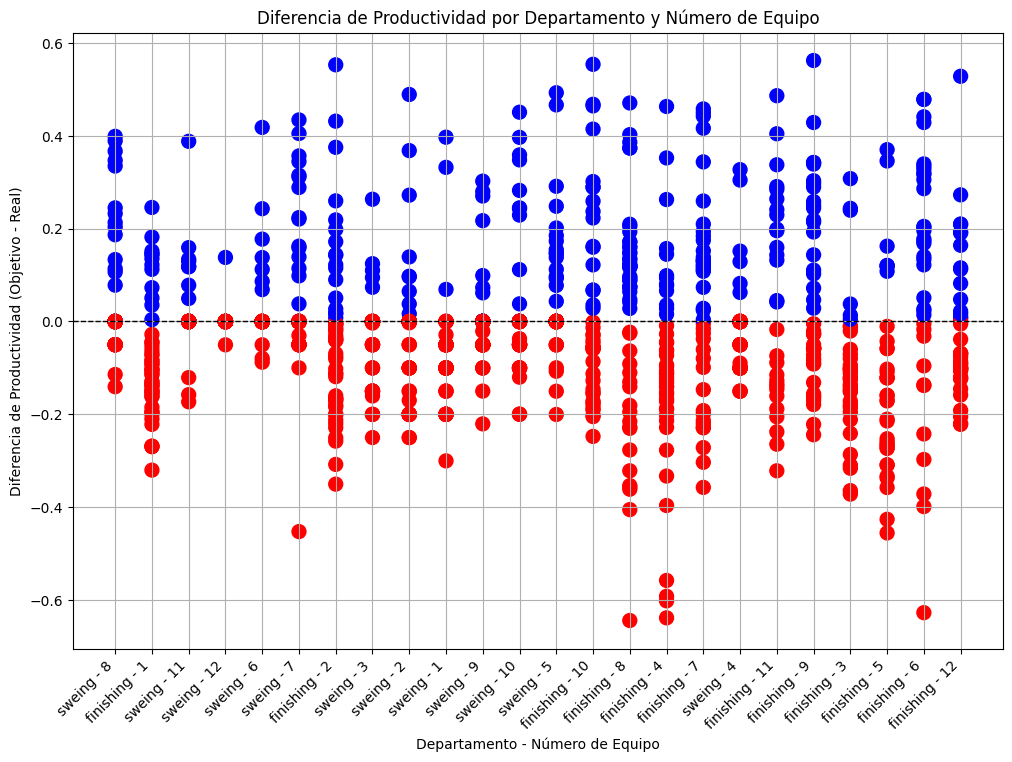

In [19]:
# Agregar una columna para el departamento y el número de equipo
df['departamento_numero_equipo'] = df['department'].str.strip() + ' - ' + df['team'].astype(str)

# Calcular la diferencia entre la productividad objetivo y la real
df['productivity_difference'] = df['targeted_productivity'] - df['actual_productivity']

df.groupby('departamento_numero_equipo')['productivity_difference'].mean()

# Asignar colores a las diferencias positivas y negativas
df['color'] = ['blue' if diff >= 0 else 'red' for diff in df['productivity_difference']]

# Graficar la diferencia de productividad por departamento y número de equipo
plt.figure(figsize=(12, 8))
plt.scatter(df['departamento_numero_equipo'], df['productivity_difference'], c=df['color'], s=100)
plt.xlabel('Departamento - Número de Equipo')
plt.ylabel('Diferencia de Productividad (Objetivo - Real)')
plt.title('Diferencia de Productividad por Departamento y Número de Equipo')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.grid(True)
plt.show()

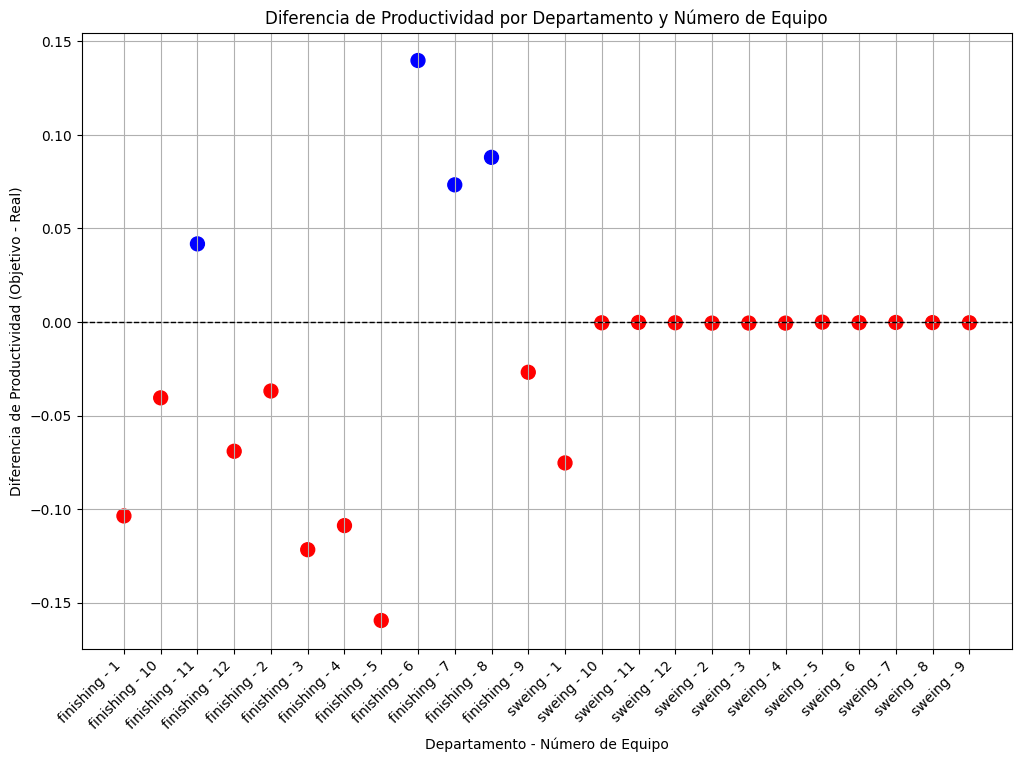

In [23]:
# Agregar una columna para el departamento y el número de equipo
df['departamento_numero_equipo'] = df['department'].str.strip() + ' - ' + df['team'].astype(str)

# Calcular la diferencia entre la productividad objetivo y la real
df['productivity_difference'] = df['targeted_productivity'] - df['actual_productivity']

means_by_dpto = df.groupby('departamento_numero_equipo')[['productivity_difference']].median().reset_index()


# Asignar colores a las diferencias positivas y negativas
means_by_dpto['color'] = ['blue' if diff >= 0 else 'red' for diff in means_by_dpto['productivity_difference']]

# Graficar la diferencia de productividad por departamento y número de equipo
plt.figure(figsize=(12, 8))
plt.scatter(means_by_dpto['departamento_numero_equipo'], means_by_dpto['productivity_difference'], c=means_by_dpto['color'], s=100)
plt.xlabel('Departamento - Número de Equipo')
plt.ylabel('Diferencia de Productividad (Objetivo - Real)')
plt.title('Diferencia de Productividad por Departamento y Número de Equipo')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.grid(True)
plt.show()

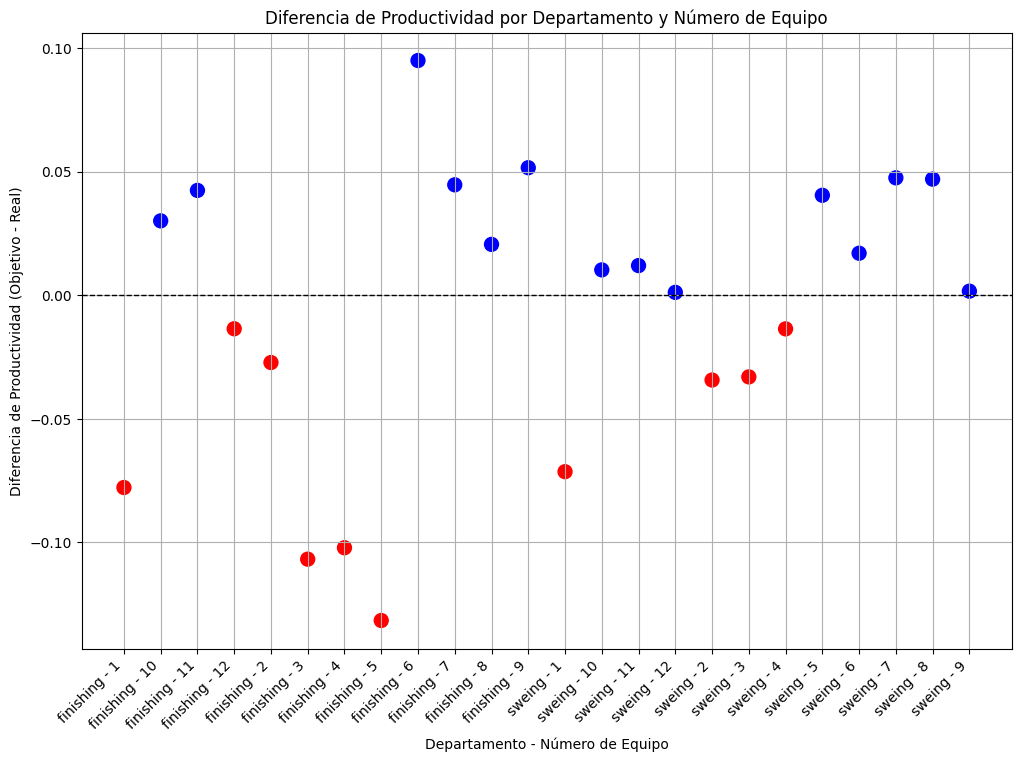

In [22]:
# Agregar una columna para el departamento y el número de equipo
df['departamento_numero_equipo'] = df['department'].str.strip() + ' - ' + df['team'].astype(str)

# Calcular la diferencia entre la productividad objetivo y la real
df['productivity_difference'] = df['targeted_productivity'] - df['actual_productivity']

means_by_dpto = df.groupby('departamento_numero_equipo')[['productivity_difference']].mean().reset_index()


# Asignar colores a las diferencias positivas y negativas
means_by_dpto['color'] = ['blue' if diff >= 0 else 'red' for diff in means_by_dpto['productivity_difference']]

# Graficar la diferencia de productividad por departamento y número de equipo
plt.figure(figsize=(12, 8))
plt.scatter(means_by_dpto['departamento_numero_equipo'], means_by_dpto['productivity_difference'], c=means_by_dpto['color'], s=100)
plt.xlabel('Departamento - Número de Equipo')
plt.ylabel('Diferencia de Productividad (Objetivo - Real)')
plt.title('Diferencia de Productividad por Departamento y Número de Equipo')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.grid(True)
plt.show()

In [30]:
df.dtypes

date                           object
quarter                        object
department                     object
day                            object
team                            int64
targeted_productivity         float64
smv                           float64
wip                           float64
over_time                       int64
incentive                       int64
idle_time                     float64
idle_men                        int64
no_of_style_change              int64
no_of_workers                 float64
actual_productivity           float64
productivity_difference       float64
departamento_numero_equipo     object
color                          object
dtype: object

In [47]:
res_1 = scipy.stats.linregress(x= df['no_of_workers'], y=df['actual_productivity'])
print("no_of_workers", res_1)

res_2 = scipy.stats.linregress(x= df['targeted_productivity'], y=df['actual_productivity'])
print('targeted_productivity', res_2)

res_3 = scipy.stats.linregress(x= df['smv'], y=df['actual_productivity'])
print('smv', res_3)

res_5 = scipy.stats.linregress(x= df['over_time'], y=df['actual_productivity'])
print('over_time', res_5)

res_6 = scipy.stats.linregress(x= df['incentive'], y=df['actual_productivity'])
print('incentive', res_6)

res_7 = scipy.stats.linregress(x= df['idle_time'], y=df['actual_productivity'])
print('idle_time', res_7)

res_8= scipy.stats.linregress(x= df['idle_men'], y=df['actual_productivity'])
print('idle_men', res_8)

res_9 = scipy.stats.linregress(x= df['no_of_style_change'], y=df['actual_productivity'])
print('no_of_style_change', res_9)

res_10 = scipy.stats.linregress(x= df['no_of_workers'], y=df['actual_productivity'])
print('no_of_workers', res_10)





no_of_workers LinregressResult(slope=-0.0004558428546491542, intercept=0.750867753438935, rvalue=-0.05799059224354605, pvalue=0.044863456754932675, stderr=0.00022700853075450754, intercept_stderr=0.009332695688781393)
targeted_productivity LinregressResult(slope=0.7514793036147003, intercept=0.1867874383341931, rvalue=0.42159388370015033, pvalue=8.997899153183147e-53, stderr=0.046756606283411876, intercept_stderr=0.034420551278448015)
smv LinregressResult(slope=-0.001946687302128127, intercept=0.7644124361426357, rvalue=-0.12208884072558181, pvalue=2.2811300110690743e-05, stderr=0.000457799358539589, intercept_stderr=0.008521994138538682)
over_time LinregressResult(slope=-2.8243538971013373e-06, intercept=0.7479912213265892, rvalue=-0.05420583714002143, pvalue=0.060818080900657115, stderr=1.5050472277948164e-06, intercept_stderr=0.008522733631761814)
incentive LinregressResult(slope=8.337289165369469e-05, intercept=0.7319053749085574, rvalue=0.07653762727386518, pvalue=0.00806957180468

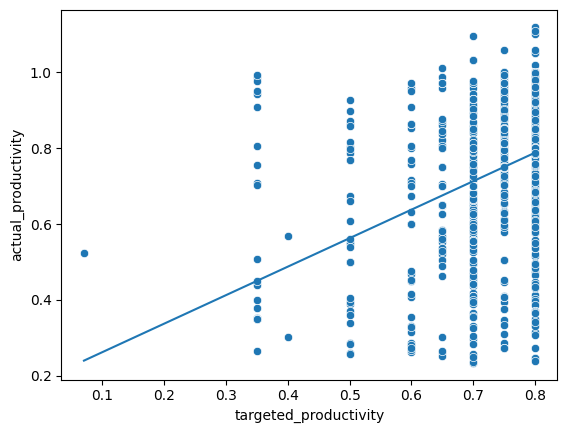

In [53]:
sns.scatterplot(x=df['targeted_productivity'], y=df['actual_productivity'])

fx1 = np.array([df['targeted_productivity'].min(), df['targeted_productivity'].max()])
fy1 = res_2.intercept + res_2.slope * fx1

plt.plot(fx1, fy1)




In [84]:
df.targeted_productivity.value_counts()

targeted_productivity
0.80    540
0.70    242
0.75    216
0.65     63
0.60     57
0.50     49
0.35     27
0.40      2
0.07      1
Name: count, dtype: int64

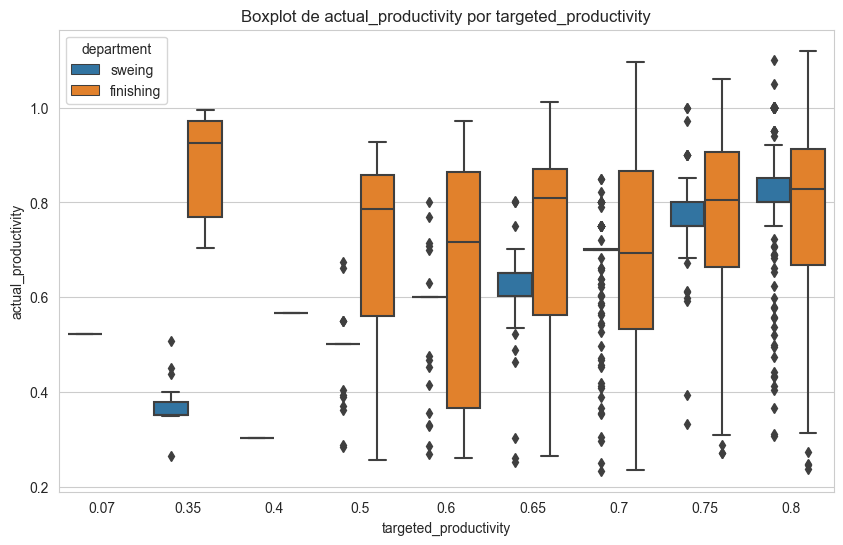

In [179]:
# Configurar el estilo y el tamaño del gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Crear el boxplot usando Seaborn
sns.boxplot(data=df, x='targeted_productivity', y='actual_productivity', hue='department')

# Configurar etiquetas y título
plt.xlabel('targeted_productivity')
plt.ylabel('actual_productivity')
plt.title('Boxplot de actual_productivity por targeted_productivity')

# Mostrar el gráfico
plt.show()

In [57]:
df.idle_time.value_counts()

idle_time
0.0      1179
3.5         3
2.0         2
5.0         2
8.0         2
4.5         2
4.0         2
90.0        1
150.0       1
270.0       1
300.0       1
6.5         1
Name: count, dtype: int64

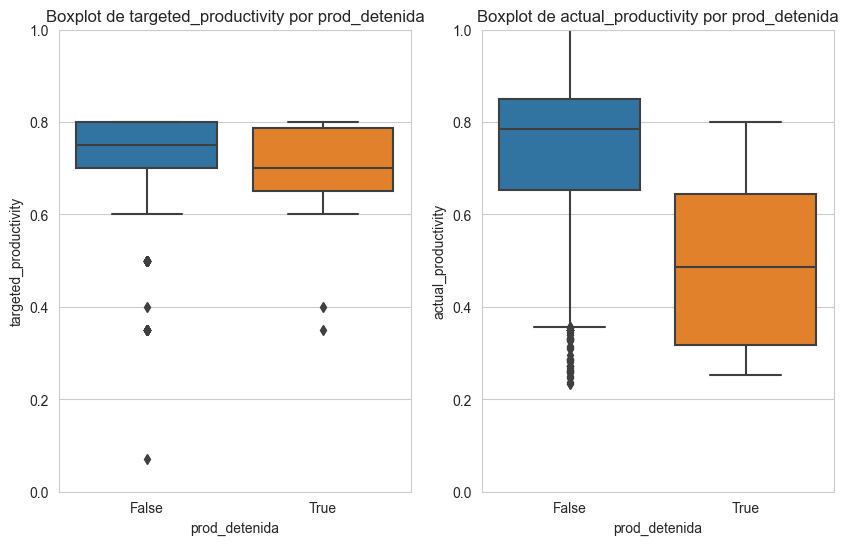

In [64]:
# Configurar el estilo y el tamaño del gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

df["prod_detenida"] = (df.idle_time > 0)

# Crear el boxplot usando Seaborn
plt.subplot(1,2,2)
sns.boxplot(data=df, x='prod_detenida', y='actual_productivity')

# Configurar etiquetas y título
plt.xlabel('prod_detenida')
plt.ylabel('actual_productivity')
plt.title('Boxplot de actual_productivity por prod_detenida')
plt.ylim(0,1)

plt.subplot(1,2,1)
sns.boxplot(data=df, x='prod_detenida', y='targeted_productivity')

# Configurar etiquetas y título
plt.xlabel('prod_detenida')
plt.ylabel('targeted_productivity')
plt.title('Boxplot de targeted_productivity por prod_detenida')
plt.ylim(0,1)

# Mostrar el gráfico
plt.show()

In [67]:
df.no_of_style_change.value_counts()

no_of_style_change
0    1050
1     114
2      33
Name: count, dtype: int64

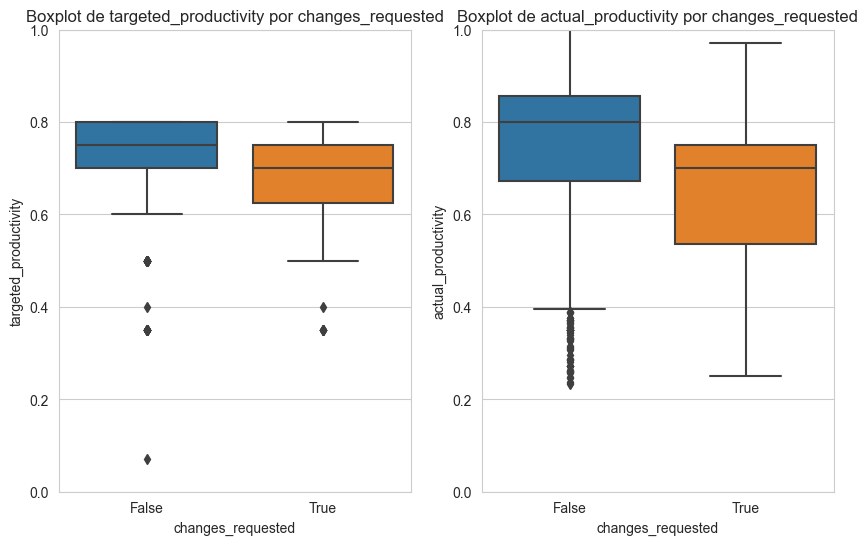

In [68]:
# Configurar el estilo y el tamaño del gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

df["changes_requested"] = (df.no_of_style_change > 0)

# Crear el boxplot usando Seaborn
plt.subplot(1,2,2)
sns.boxplot(data=df, x='changes_requested', y='actual_productivity')

# Configurar etiquetas y título
plt.xlabel('changes_requested')
plt.ylabel('actual_productivity')
plt.title('Boxplot de actual_productivity por changes_requested')
plt.ylim(0,1)

plt.subplot(1,2,1)
sns.boxplot(data=df, x='changes_requested', y='targeted_productivity')

# Configurar etiquetas y título
plt.xlabel('changes_requested')
plt.ylabel('targeted_productivity')
plt.title('Boxplot de targeted_productivity por changes_requested')
plt.ylim(0,1)

# Mostrar el gráfico
plt.show()

In [70]:
df.var(numeric_only=True)

team                       1.199904e+01
targeted_productivity      9.582641e-03
smv                        1.197540e+02
wip                        3.376241e+06
over_time                  1.121462e+07
incentive                  2.565848e+04
idle_time                  1.615379e+02
idle_men                   1.068628e+01
no_of_style_change         1.830538e-01
no_of_workers              4.927373e+02
actual_productivity        3.044603e-02
productivity_difference    2.562636e-02
prod_detenida              1.482385e-02
changes_requested          1.078155e-01
dtype: float64

<Axes: >

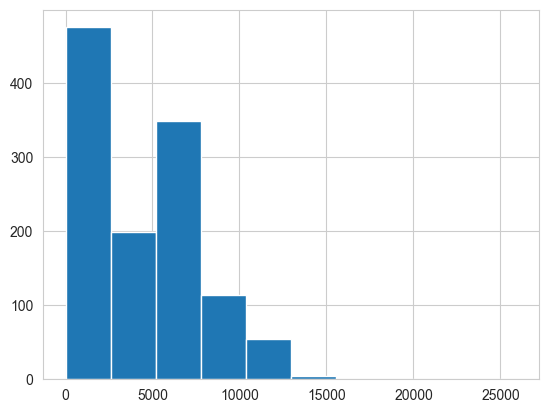

In [75]:
df.over_time.hist()

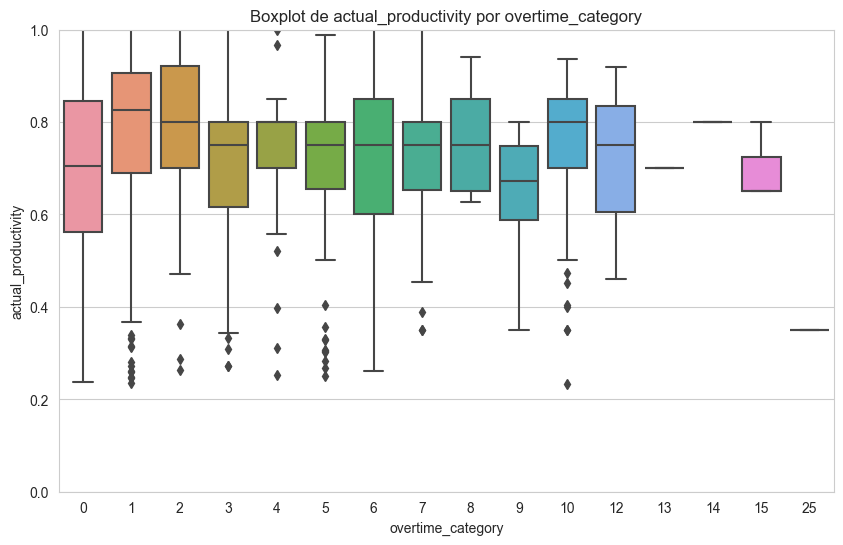

In [79]:
# Configurar el estilo y el tamaño del gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

df["overtime_category"] = df.over_time // 1000

# Crear el boxplot usando Seaborn
sns.boxplot(data=df, x='overtime_category', y='actual_productivity')

# Configurar etiquetas y título
plt.xlabel('overtime_category')
plt.ylabel('actual_productivity')
plt.title('Boxplot de actual_productivity por overtime_category')
plt.ylim(0,1)

# Mostrar el gráfico
plt.show()

count    1197.000000
mean       38.210526
std       160.182643
min         0.000000
25%         0.000000
50%         0.000000
75%        50.000000
max      3600.000000
Name: incentive, dtype: float64


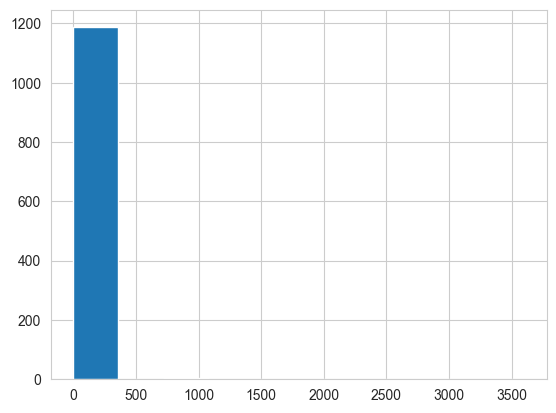

In [82]:
df.incentive.hist()
print(df.incentive.describe())

In [83]:
df.incentive.value_counts()

incentive
0       604
50      113
63       61
45       54
30       52
23       38
38       29
60       28
40       27
75       24
113      21
88       19
34       17
56       14
26        9
100       7
55        7
81        7
69        6
65        6
70        6
35        5
960       5
94        4
44        4
90        3
24        2
27        2
49        2
119       2
46        2
1080      1
1440      1
2880      1
3600      1
32        1
1200      1
62        1
98        1
33        1
138       1
93        1
53        1
29        1
21        1
37        1
54        1
25        1
Name: count, dtype: int64

count    1186.000000
mean       25.801012
std        30.248744
min         0.000000
25%         0.000000
50%         0.000000
75%        50.000000
max       119.000000
Name: incentive, dtype: float64


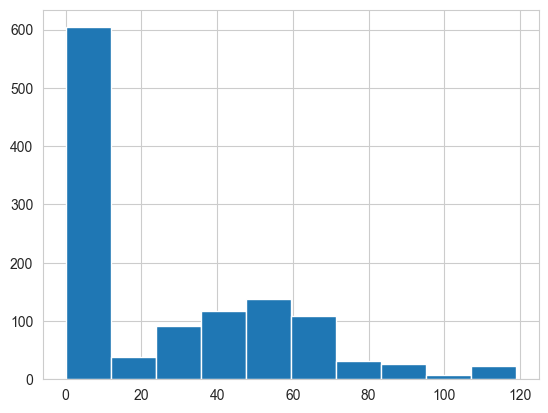

In [74]:
datos_filtrados = df[df.incentive <= 120]
datos_filtrados.incentive.hist()
print(datos_filtrados.incentive.describe())

/var/folders/lv/37ddsnp916s1w4630nyngjbr0000gn/T/ipykernel_76426/1141208325.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_filtrados["incentive_category"] = datos_filtrados.incentive // 10


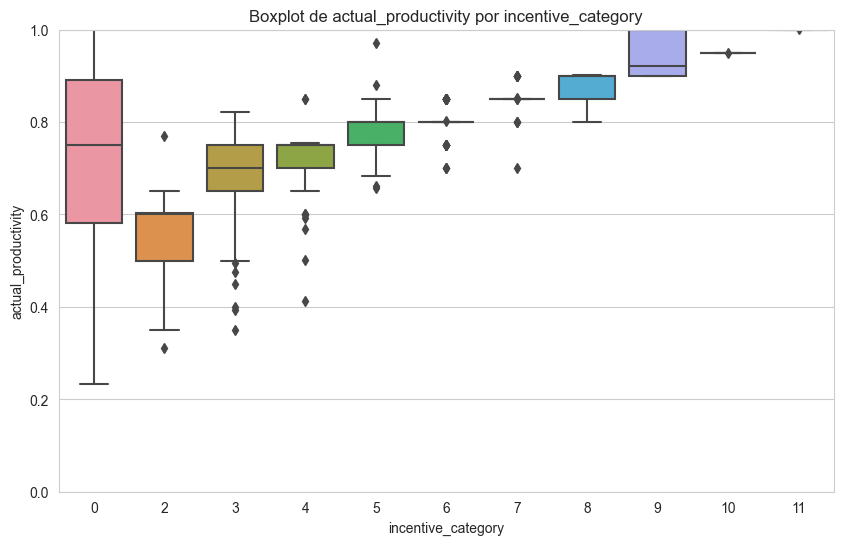

incentive_category
0     604
5     136
3     106
6     102
4      89
2      54
7      30
8      26
11     23
9       9
10      7
Name: count, dtype: int64


In [87]:
# Configurar el estilo y el tamaño del gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

datos_filtrados["incentive_category"] = datos_filtrados.incentive // 10

# Crear el boxplot usando Seaborn
sns.boxplot(data=datos_filtrados, x='incentive_category', y='actual_productivity')

# Configurar etiquetas y título
plt.xlabel('incentive_category')
plt.ylabel('actual_productivity')
plt.title('Boxplot de actual_productivity por incentive_category')
plt.ylim(0,1)

# Mostrar el gráfico
plt.show()
print(datos_filtrados.incentive_category.value_counts())

In [96]:
datos_filtrados = df[(0 < df.incentive) & (df.incentive <= 120)]
scipy.stats.linregress(x=datos_filtrados.incentive, y=datos_filtrados['actual_productivity'])

LinregressResult(slope=0.004618665546708025, intercept=0.5149398440854545, rvalue=0.8056693867774873, pvalue=5.194238021423546e-134, stderr=0.00014100528283018832, intercept_stderr=0.008000774542225343)

In [97]:
len(datos_filtrados) / len(df)

0.48621553884711777

In [98]:
df.day.value_counts()

day
Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: count, dtype: int64

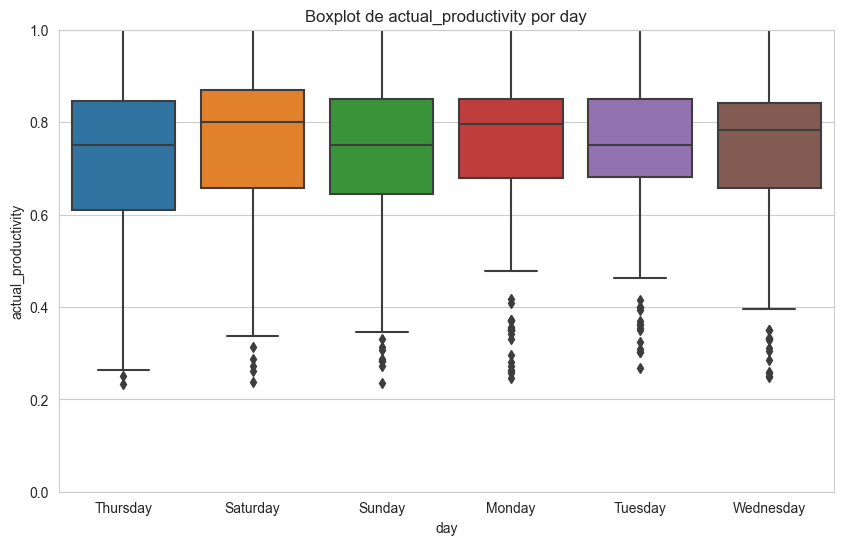

In [163]:
# Configurar el estilo y el tamaño del gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Crear el boxplot usando Seaborn
sns.boxplot(data=df, x='day', y='actual_productivity')

# Configurar etiquetas y título
plt.xlabel('day')
plt.ylabel('actual_productivity')
plt.title('Boxplot de actual_productivity por day')
plt.ylim(0,1)

# Mostrar el gráfico
plt.show()

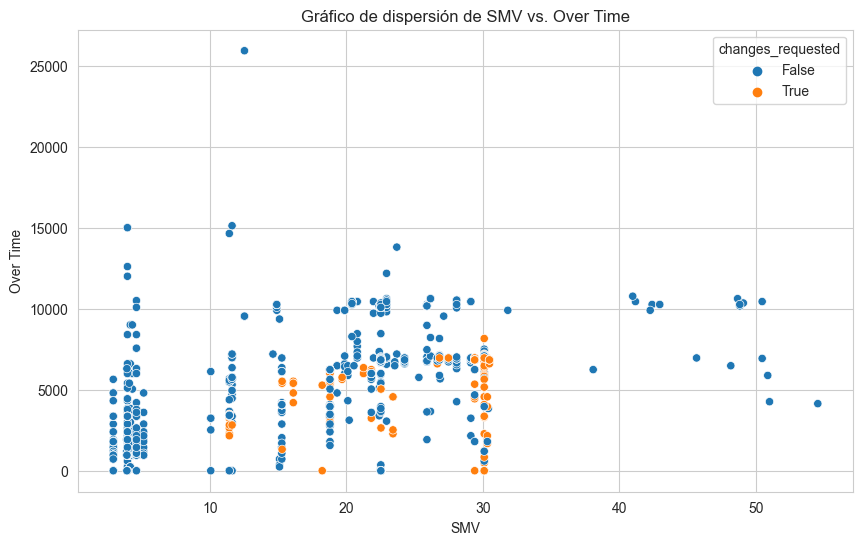

In [108]:
# Configurar el estilo y el tamaño del gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Crear el scatter plot usando Seaborn
sns.scatterplot(data=df, x='smv', y='over_time', hue="changes_requested")

# Configurar etiquetas y título
plt.xlabel('SMV')
plt.ylabel('Over Time')
plt.title('Gráfico de dispersión de SMV vs. Over Time')

# Mostrar el gráfico
plt.show()

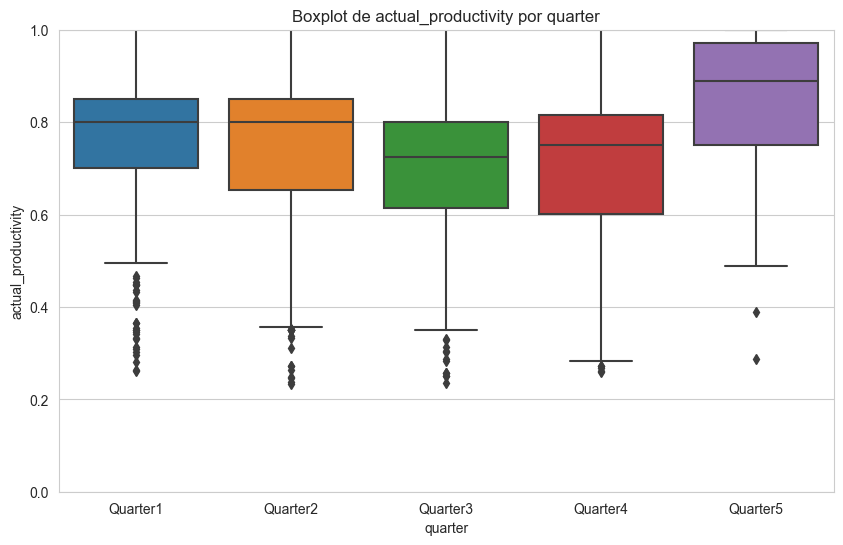

In [161]:
# Configurar el estilo y el tamaño del gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Crear el boxplot usando Seaborn
sns.boxplot(data=df, x='quarter', y='actual_productivity')

# Configurar etiquetas y título
plt.xlabel('quarter')
plt.ylabel('actual_productivity')
plt.title('Boxplot de actual_productivity por quarter')
plt.ylim(0,1)

# Mostrar el gráfico
plt.show()

In [118]:
df['date'] = pd.to_datetime(df['date'])
df['date'].min(), df['date'].max()

(Timestamp('2015-01-01 00:00:00'), Timestamp('2015-03-11 00:00:00'))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Version

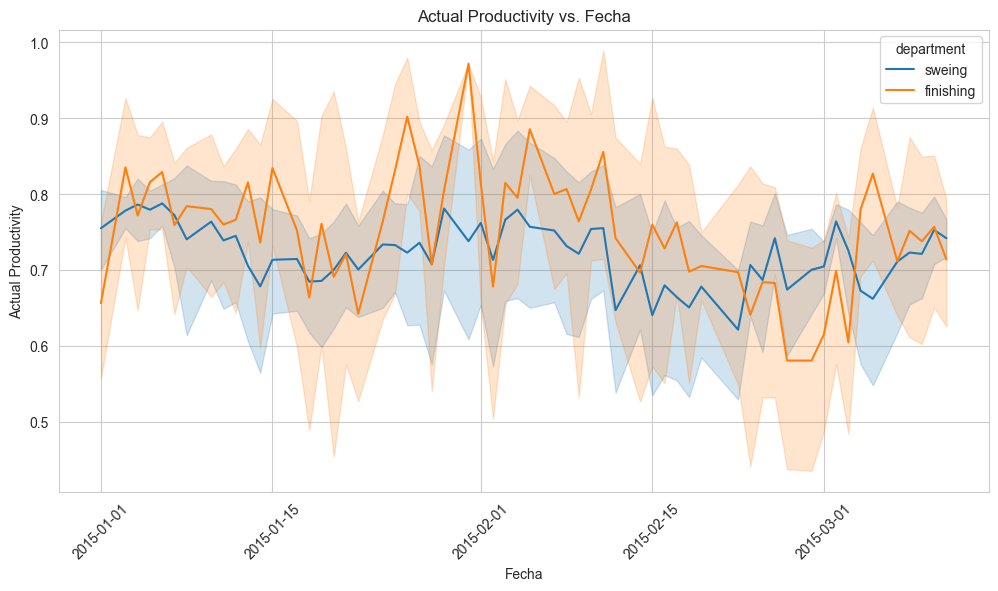

In [159]:
# Configurar el estilo y el tamaño del gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Crear el gráfico usando Seaborn
sns.lineplot(data=df, x='date', y='actual_productivity', hue='department')

# Configurar etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Actual Productivity')
plt.title('Actual Productivity vs. Fecha')

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

In [123]:
df.department = df.department.str.strip()
df.department.value_counts()

department
sweing       691
finishing    506
Name: count, dtype: int64

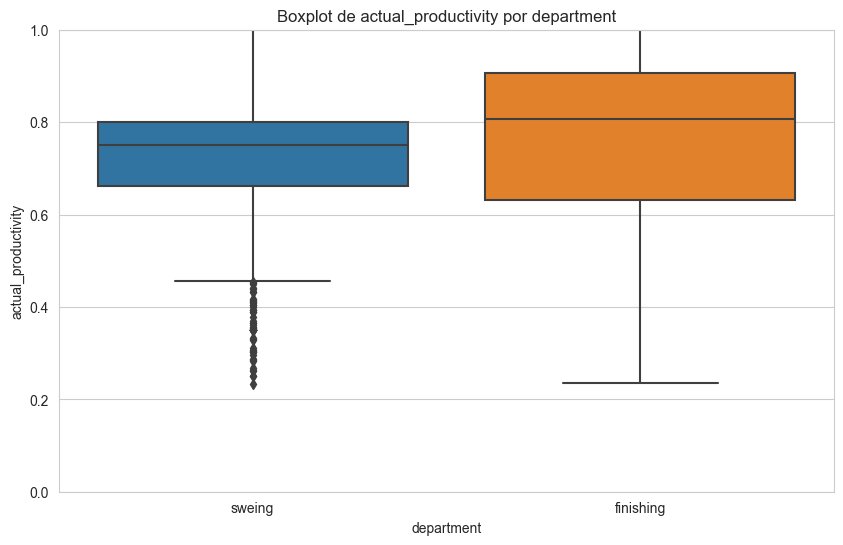

In [129]:
# Configurar el estilo y el tamaño del gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Crear el boxplot usando Seaborn
sns.boxplot(data=df, x='department', y='actual_productivity')

# Configurar etiquetas y título
plt.xlabel('department')
plt.ylabel('actual_productivity')
plt.title('Boxplot de actual_productivity por department')
plt.ylim(0,1)

# Mostrar el gráfico
plt.show()

In [128]:
datos_filtrados = df[(0 < df.incentive) & (df.incentive <= 120)]
datos_filtrados.department.value_counts()
# INCENTIVOS SOLO PARA sweing

department
sweing    582
Name: count, dtype: int64

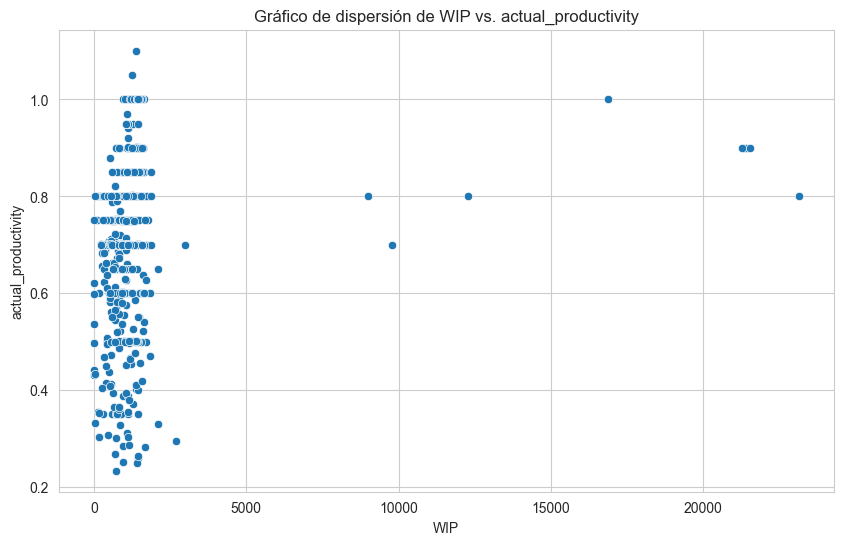

In [135]:
datos_sweing = df[df.department == 'sweing']


# Configurar el estilo y el tamaño del gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Crear el scatter plot usando Seaborn
sns.scatterplot(data=datos_sweing, x='wip', y='actual_productivity')

# Configurar etiquetas y título
plt.xlabel('WIP')
plt.ylabel('actual_productivity')
plt.title('Gráfico de dispersión de WIP vs. actual_productivity')

# Mostrar el gráfico
plt.show()

count      691.000000
mean      1190.465991
std       1837.455001
min          7.000000
25%        774.500000
50%       1039.000000
75%       1252.500000
max      23122.000000
Name: wip, dtype: float64

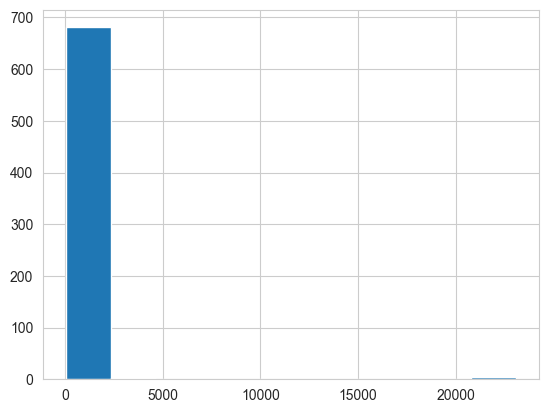

In [139]:
datos_sweing.wip.hist()
datos_sweing.wip.describe()

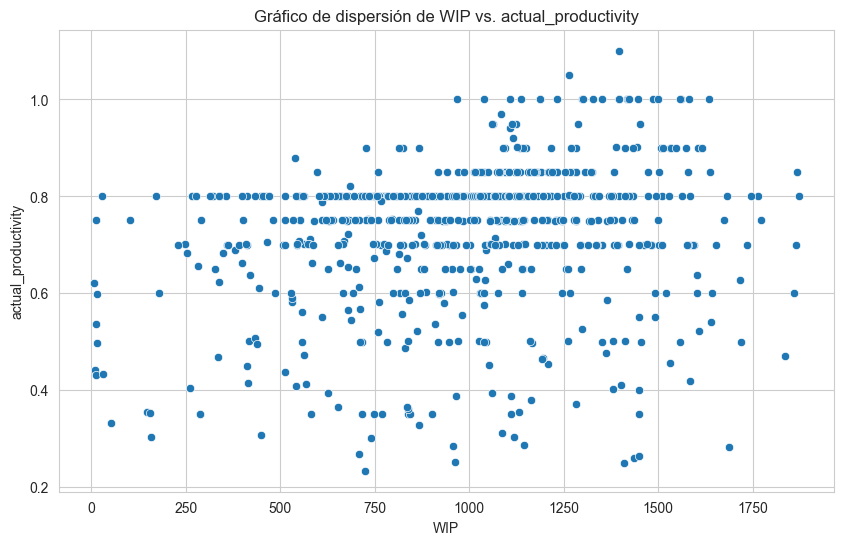

In [141]:
datos_sweing = df[(df.department == 'sweing') & (df.wip < 2000)]


# Configurar el estilo y el tamaño del gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Crear el scatter plot usando Seaborn
sns.scatterplot(data=datos_sweing, x='wip', y='actual_productivity')

# Configurar etiquetas y título
plt.xlabel('WIP')
plt.ylabel('actual_productivity')
plt.title('Gráfico de dispersión de WIP vs. actual_productivity')

# Mostrar el gráfico
plt.show()

/var/folders/lv/37ddsnp916s1w4630nyngjbr0000gn/T/ipykernel_76426/2924043150.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_sweing["wip_category"] = datos_sweing.wip // 250


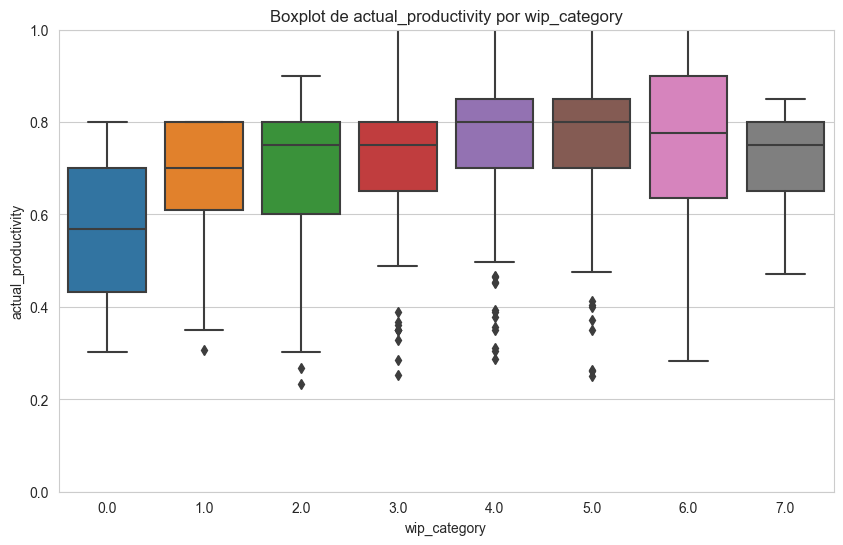

wip_category
4.0    204
3.0    154
5.0    112
2.0     96
1.0     44
6.0     44
0.0     18
7.0      7
Name: count, dtype: int64


In [142]:
# Configurar el estilo y el tamaño del gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

datos_sweing["wip_category"] = datos_sweing.wip // 250

# Crear el boxplot usando Seaborn
sns.boxplot(data=datos_sweing, x='wip_category', y='actual_productivity')

# Configurar etiquetas y título
plt.xlabel('wip_category')
plt.ylabel('actual_productivity')
plt.title('Boxplot de actual_productivity por wip_category')
plt.ylim(0,1)

# Mostrar el gráfico
plt.show()
print(datos_sweing.wip_category.value_counts())

In [143]:
scipy.stats.linregress(x=datos_sweing.wip_category, y=datos_sweing['actual_productivity'])

LinregressResult(slope=0.025190821512274107, intercept=0.6332880180901351, rvalue=0.23679349836216027, pvalue=4.1579741716866203e-10, stderr=0.00397235314017198, intercept_stderr=0.015095126677812739)

In [153]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Suponiendo que tienes tus datos en un DataFrame llamado 'datos_sweing'

# Extraer las variables independientes y dependiente
X = datos_sweing[['wip', 'incentive']]
y = datos_sweing['actual_productivity']

# Inicializar y ajustar el modelo de regresión lineal múltiple
modelo = LinearRegression().fit(X, y)

# Obtener los coeficientes y el término de intercepción
coeficientes = modelo.coef_
intercepcion = modelo.intercept_

# Imprimir los coeficientes y la intercepción
print("Coeficientes:", coeficientes)
print("Intercepto:", intercepcion)

# Calcular el coeficiente de determinación (R^2)
r2 = modelo.score(X, y)

# Imprimir el coeficiente de determinación (R^2)
print("Coeficiente de determinación (R^2):", r2)


Coeficientes: [-6.60235676e-06  4.64822341e-03]
Intercepto: 0.5200590953458417
Coeficiente de determinación (R^2): 0.6508828481258988


In [21]:
datos_sweing = df[df.department == 'sweing']
datos_sweing.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000
mean,6.520984,0.723980,23.245412,1190.465991,6508.205499,44.483357,1.264834,0.639653,0.260492,52.445731,0.722013
std,3.458333,0.102006,6.976497,1837.455001,2864.505604,27.596591,16.712923,4.283652,0.537185,9.417353,0.154784
min,1.000000,0.070000,10.050000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0.233705
25%,4.000000,0.700000,18.790000,774.500000,4560.000000,30.000000,0.000000,0.000000,0.000000,52.000000,0.661470
50%,6.000000,0.750000,22.520000,1039.000000,6840.000000,45.000000,0.000000,0.000000,0.000000,57.000000,0.750608
75%,10.000000,0.800000,28.080000,1252.500000,7200.000000,60.000000,0.000000,0.000000,0.000000,58.000000,0.800402
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,138.000000,300.000000,45.000000,2.000000,89.000000,1.100484


# datos_finishing

In [167]:
datos_finishing = df[df.department == 'finishing']
datos_finishing.describe()

,date,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,productivity_difference,overtime_category
count,506,506.000000,506.000000,506.000000,0.0,506.000000,506.000000,506.0,506.0,506.0,506.000000,506.000000,506.000000,506.000000
mean,2015-02-04 15:02:08.063241216,6.298419,0.737352,3.887036,NaN,1917.154150,29.644269,0.0,0.0,0.0,10.252964,0.752951,-0.015599,1.363636
min,2015-01-01 00:00:00,1.000000,0.350000,2.900000,NaN,0.000000,0.000000,0.0,0.0,0.0,2.000000,0.235795,-0.644375,0.000000
25%,2015-01-17 00:00:00,3.000000,0.700000,3.900000,NaN,960.000000,0.000000,0.0,0.0,0.0,8.000000,0.631606,-0.154641,0.000000
50%,2015-02-03 00:00:00,6.000000,0.750000,3.940000,NaN,1440.000000,0.000000,0.0,0.0,0.0,8.000000,0.805909,-0.052033,1.000000
75%,2015-02-24 00:00:00,9.000000,0.800000,4.150000,NaN,1920.000000,0.000000,0.0,0.0,0.0,11.750000,0.906364,0.121681,1.000000
max,2015-03-11 00:00:00,12.000000,0.800000,5.130000,NaN,15000.000000,3600.000000,0.0,0.0,0.0,28.000000,1.120437,0.561958,15.000000
std,NaN,3.470937,0.091512,0.594110,NaN,1776.698408,244.130042,0.0,0.0,0.0,4.007819,0.197021,0.208987,1.880115


In [132]:
len(datos_finishing)

506

In [133]:
datos_finishing.isnull().sum()

date                            0
quarter                         0
department                      0
day                             0
team                            0
targeted_productivity           0
smv                             0
wip                           506
over_time                       0
incentive                       0
idle_time                       0
idle_men                        0
no_of_style_change              0
no_of_workers                   0
actual_productivity             0
productivity_difference         0
departamento_numero_equipo      0
color                           0
prod_detenida                   0
changes_requested               0
overtime_category               0
dtype: int64

In [134]:
df.isnull().sum()

date                            0
quarter                         0
department                      0
day                             0
team                            0
targeted_productivity           0
smv                             0
wip                           506
over_time                       0
incentive                       0
idle_time                       0
idle_men                        0
no_of_style_change              0
no_of_workers                   0
actual_productivity             0
productivity_difference         0
departamento_numero_equipo      0
color                           0
prod_detenida                   0
changes_requested               0
overtime_category               0
dtype: int64

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


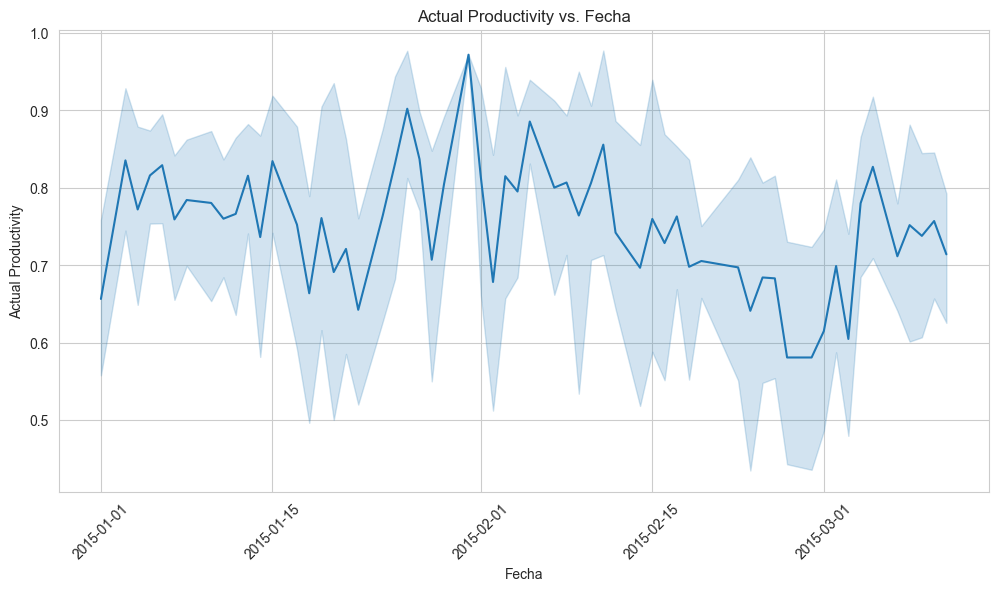

In [158]:
# Configurar el estilo y el tamaño del gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Crear el gráfico usando Seaborn
sns.lineplot(data=datos_finishing, x='date', y='actual_productivity')

# Configurar etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Actual Productivity')
plt.title('Actual Productivity vs. Fecha')

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

/var/folders/lv/37ddsnp916s1w4630nyngjbr0000gn/T/ipykernel_76426/610508314.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_finishing["no_of_workers_category"] = (datos_finishing.no_of_workers // 1).astype(int)


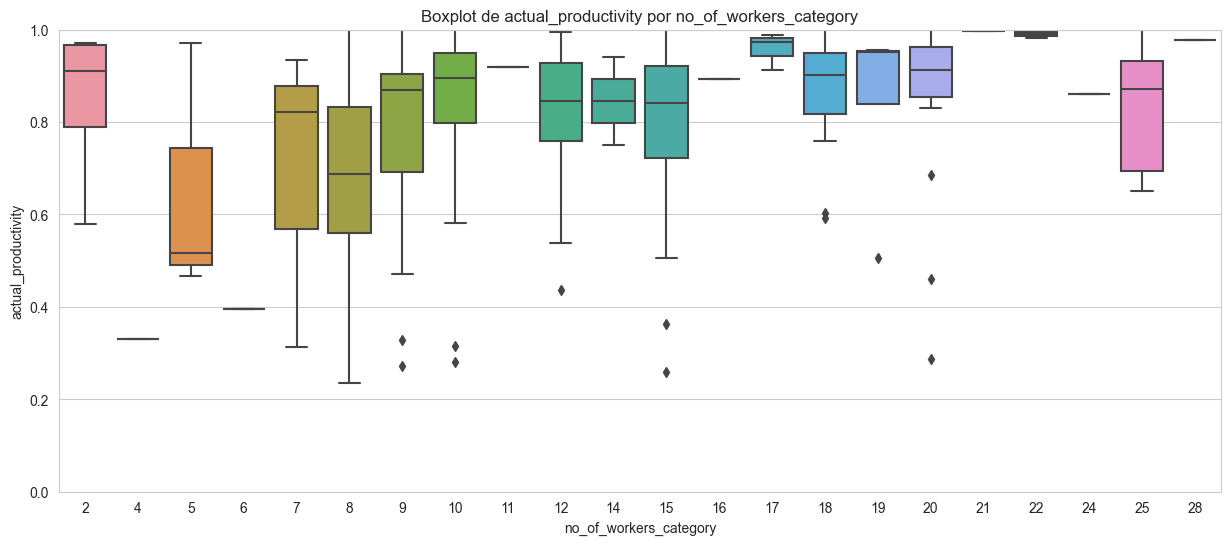

In [181]:
# Configurar el estilo y el tamaño del gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(15, 6))

datos_finishing["no_of_workers_category"] = (datos_finishing.no_of_workers // 1).astype(int)

# Crear el boxplot usando Seaborn
sns.boxplot(data=datos_finishing, x='no_of_workers_category', y='actual_productivity')

# Configurar etiquetas y título
plt.xlabel('no_of_workers_category')
plt.ylabel('actual_productivity')
plt.title('Boxplot de actual_productivity por no_of_workers_category')
plt.ylim(0,1)

# Mostrar el gráfico
plt.show()

no_of_workers
8.0     262
10.0     60
9.0      42
12.0     37
15.0     37
20.0     16
18.0     16
25.0      6
2.0       6
19.0      4
7.0       3
5.0       3
17.0      3
14.0      2
22.0      2
16.0      1
28.0      1
4.0       1
21.0      1
11.0      1
24.0      1
6.0       1
Name: count, dtype: int64

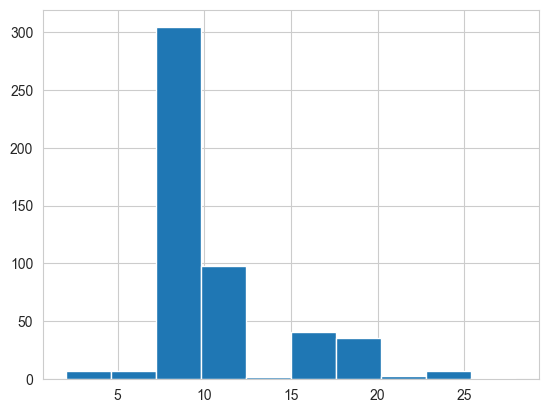

In [170]:
datos_finishing.no_of_workers.hist()
datos_finishing.no_of_workers.value_counts()

over_time
960     129
1440    109
1200     37
1800     35
1080     27
3360     22
2160     19
2400     15
1920     11
0        10
2700      8
1620      6
240       5
3780      5
3600      4
2880      3
1260      3
3840      2
1560      2
2640      2
3000      2
2280      2
3420      2
720       2
900       2
600       1
2520      1
1320      1
3060      1
1980      1
3240      1
2760      1
Name: count, dtype: int64

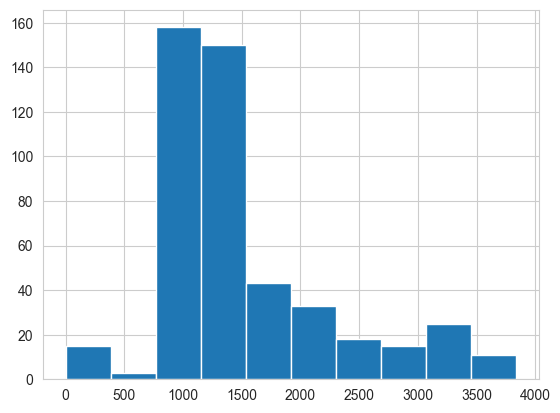

In [185]:
datos_finishing_filtered = datos_finishing[datos_finishing.over_time < 4000].copy()
datos_finishing_filtered.over_time.hist()
datos_finishing_filtered.over_time.value_counts()

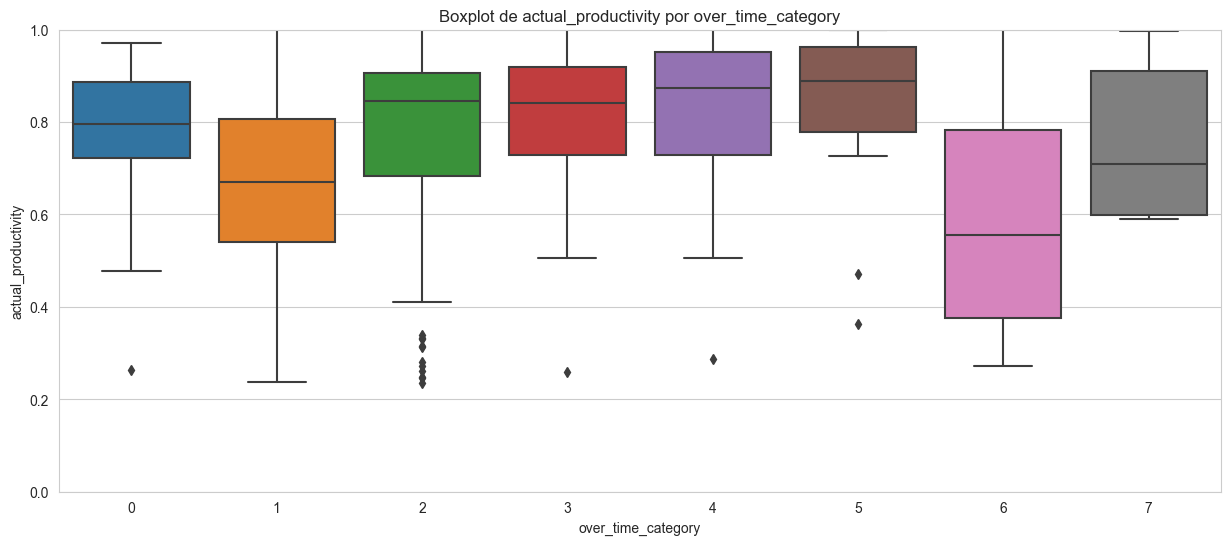

In [187]:
# Configurar el estilo y el tamaño del gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(15, 6))

datos_finishing_filtered['over_time_category'] = datos_finishing_filtered.over_time // 500

# Crear el boxplot usando Seaborn
sns.boxplot(data=datos_finishing_filtered, x='over_time_category', y='actual_productivity')

# Configurar etiquetas y título
plt.xlabel('over_time_category')
plt.ylabel('actual_productivity')
plt.title('Boxplot de actual_productivity por over_time_category')
plt.ylim(0,1)

# Mostrar el gráfico
plt.show()

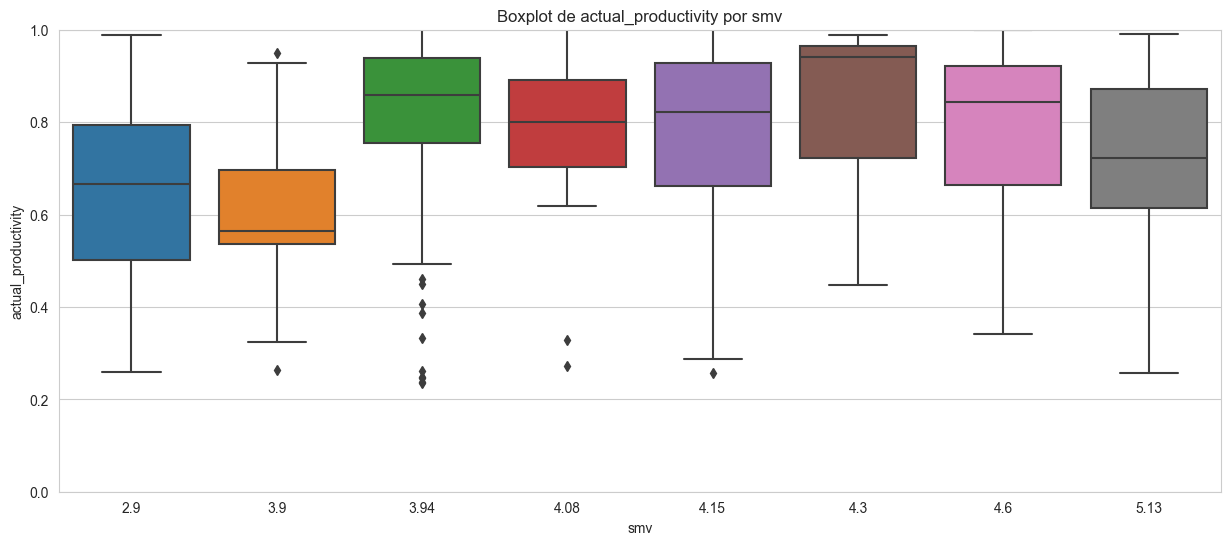

In [182]:
# Configurar el estilo y el tamaño del gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(15, 6))

# Crear el boxplot usando Seaborn
sns.boxplot(data=datos_finishing, x='smv', y='actual_productivity')

# Configurar etiquetas y título
plt.xlabel('smv')
plt.ylabel('actual_productivity')
plt.title('Boxplot de actual_productivity por smv')
plt.ylim(0,1)

# Mostrar el gráfico
plt.show()

smv
3.94    192
2.90    108
4.15     76
4.60     46
5.13     26
4.08     21
3.90     20
4.30     17
Name: count, dtype: int64

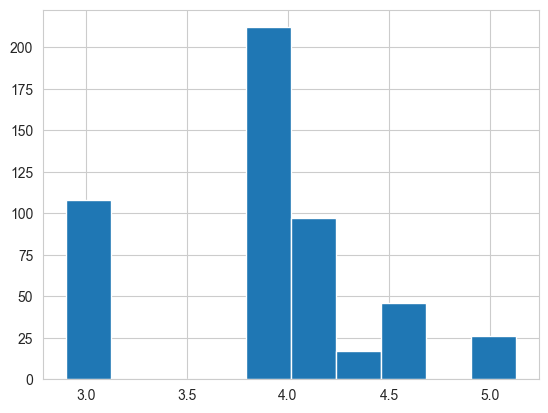

In [176]:
datos_finishing.smv.hist()
datos_finishing.smv.value_counts()

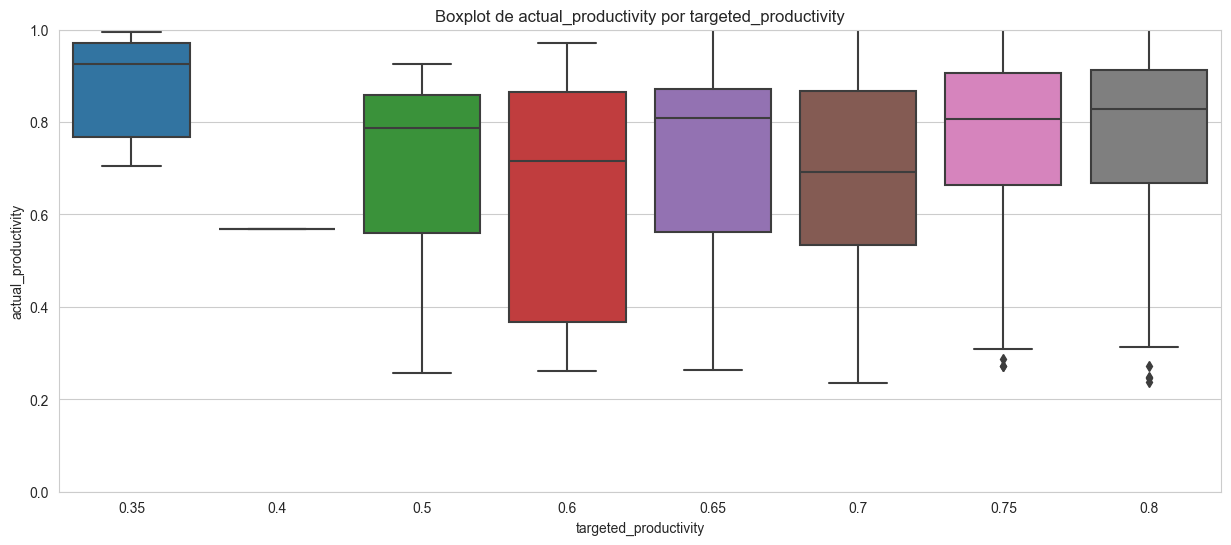

In [183]:
# Configurar el estilo y el tamaño del gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(15, 6))

# Crear el boxplot usando Seaborn
sns.boxplot(data=datos_finishing, x='targeted_productivity', y='actual_productivity')

# Configurar etiquetas y título
plt.xlabel('targeted_productivity')
plt.ylabel('actual_productivity')
plt.title('Boxplot de actual_productivity por targeted_productivity')
plt.ylim(0,1)

# Mostrar el gráfico
plt.show()

targeted_productivity
0.80    245
0.75     95
0.70     94
0.65     25
0.60     19
0.50     17
0.35     10
0.40      1
Name: count, dtype: int64

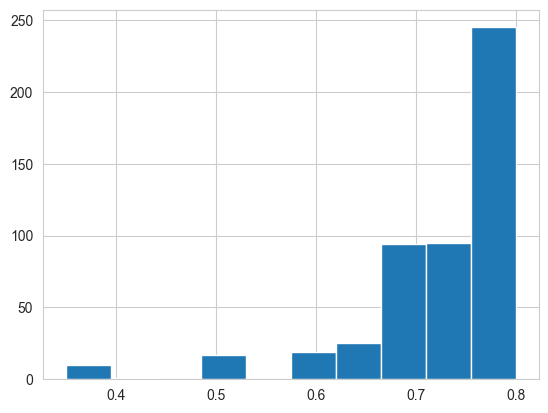

In [177]:
datos_finishing.targeted_productivity.hist()
datos_finishing.targeted_productivity.value_counts()

# Análisis Univariado


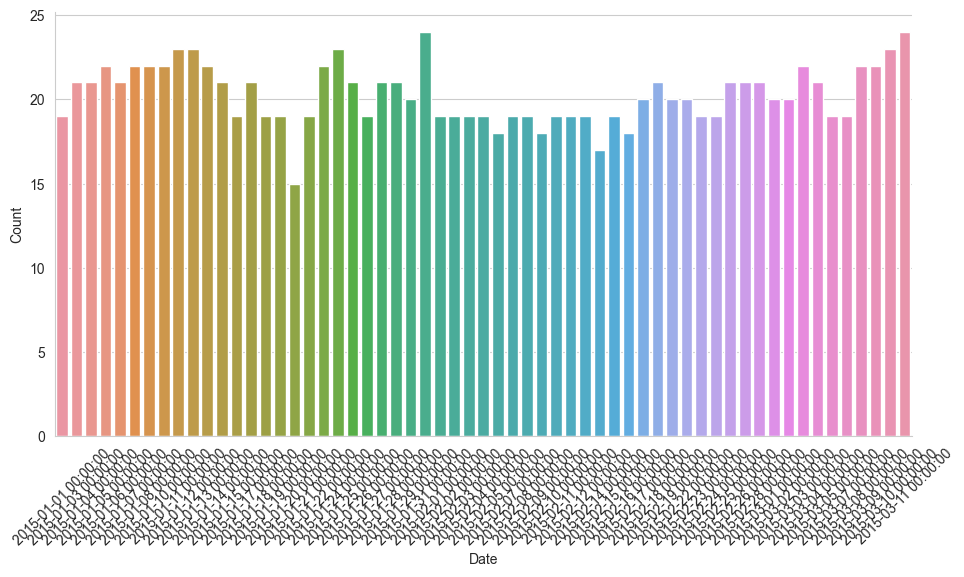

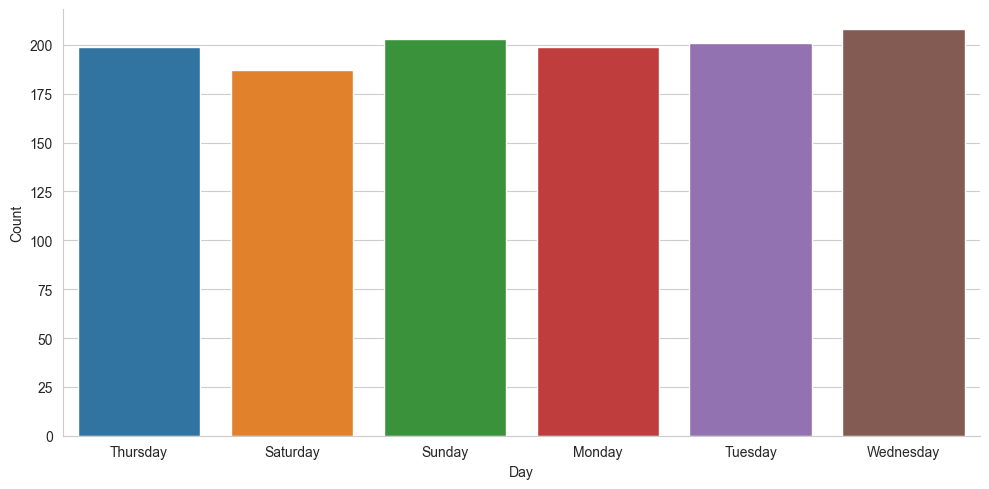

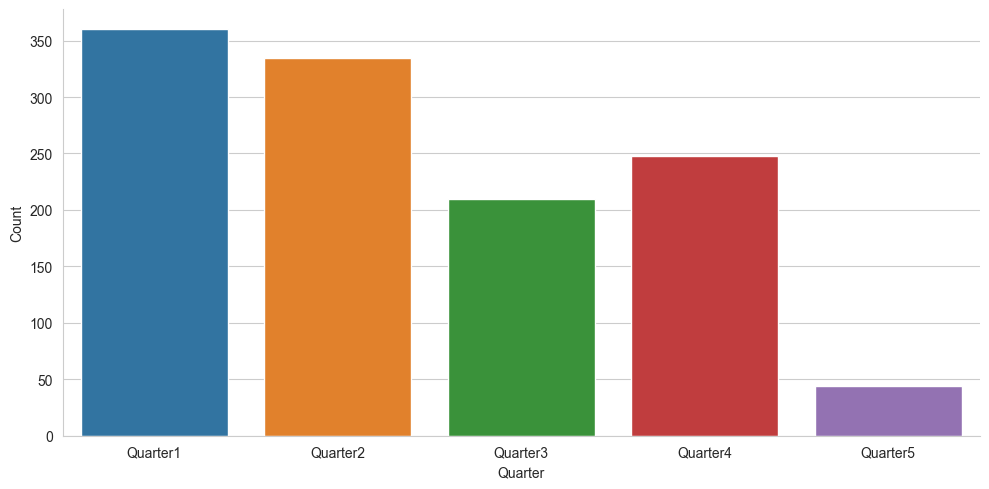

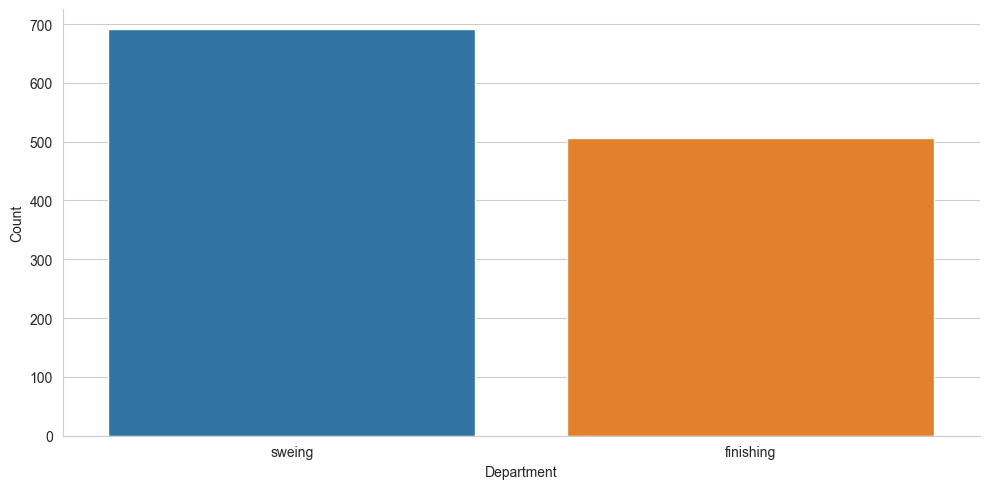

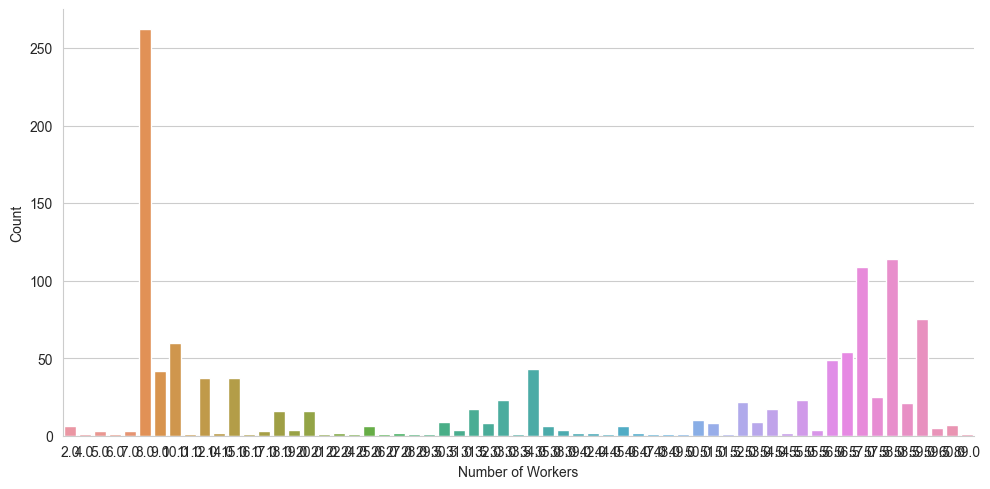

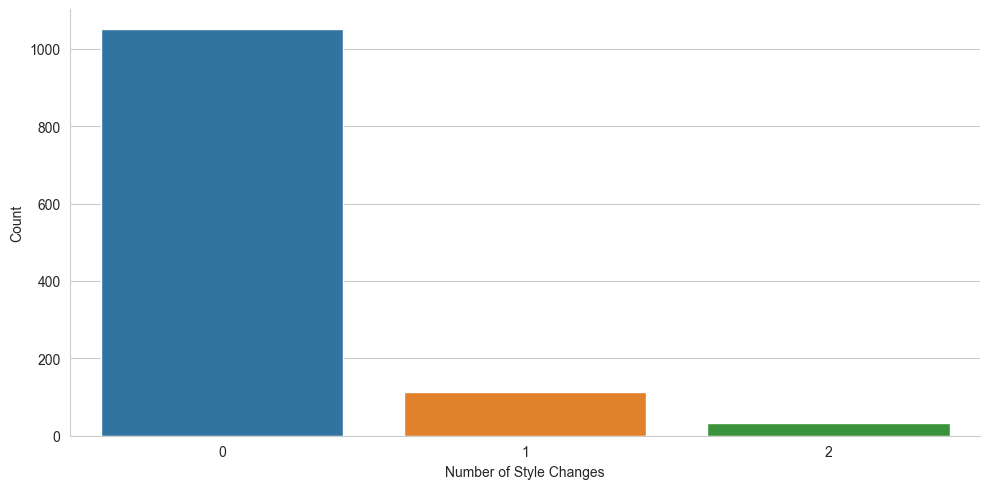

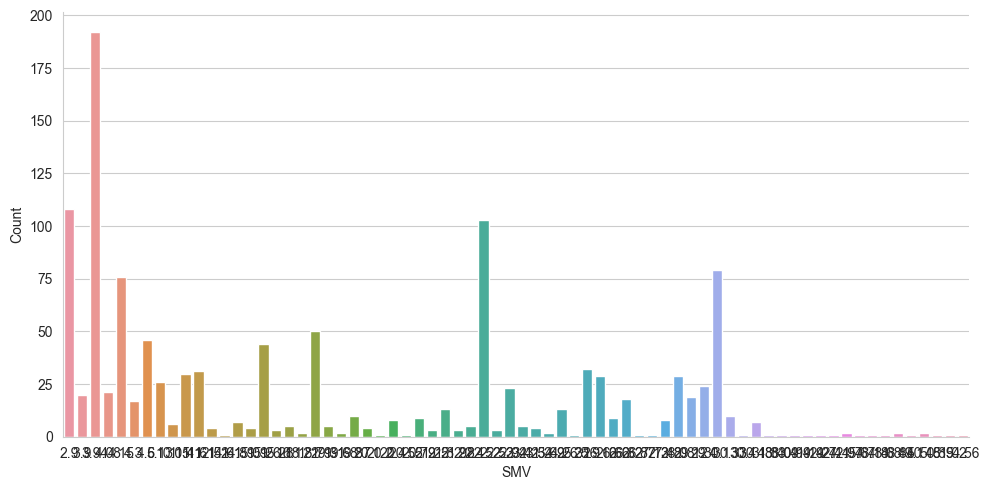

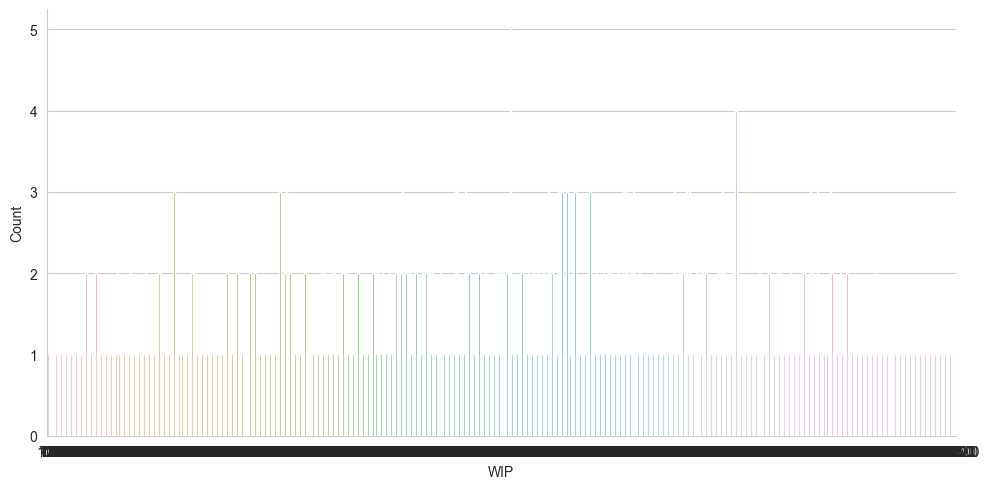

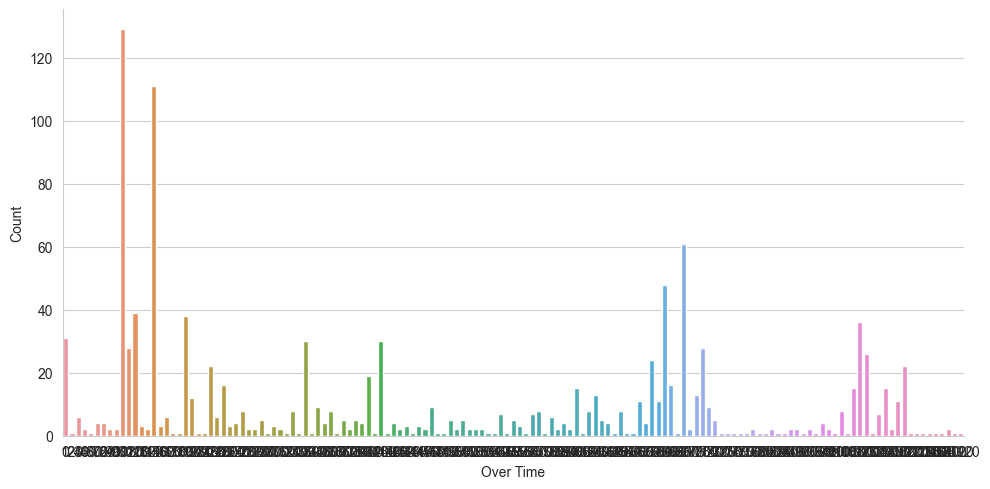

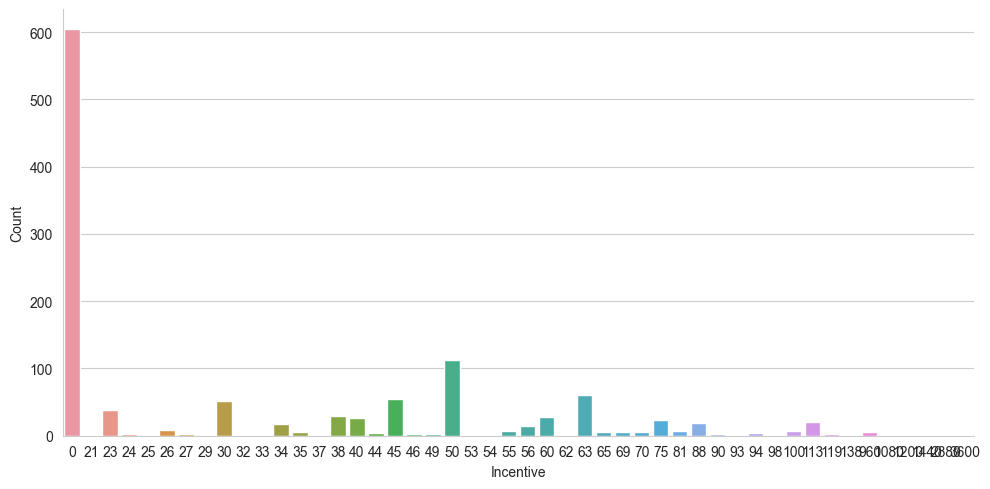

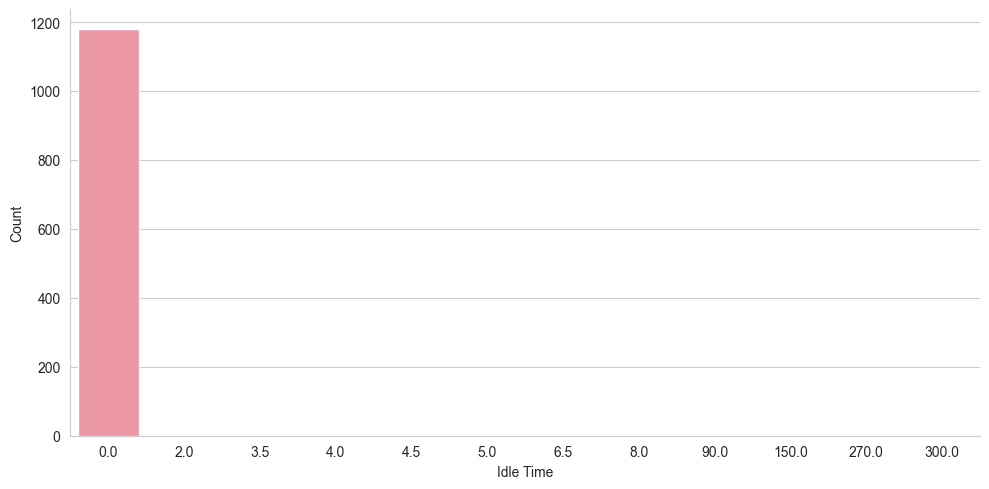

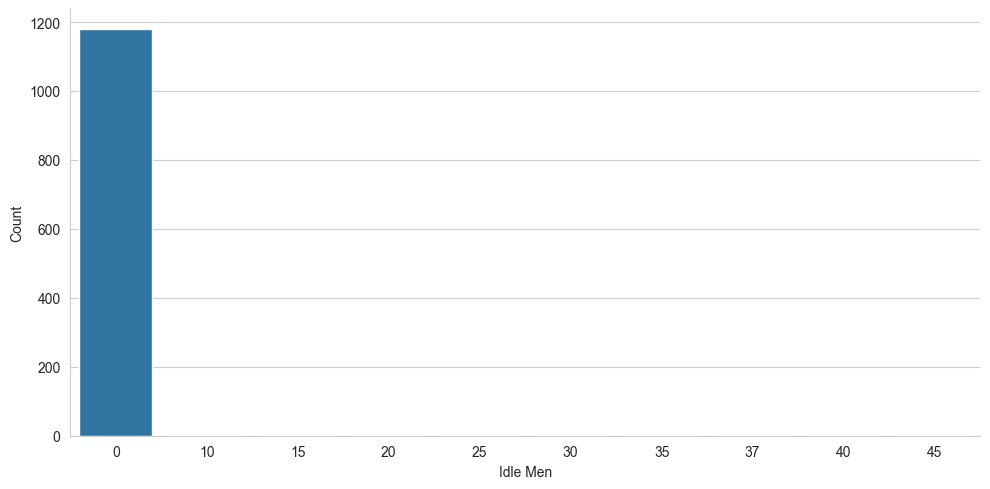

In [70]:


sns.catplot(
    data=df,
    x='date',
    kind='count',
    height=5,
    aspect=2
).set_axis_labels('Date', 'Count')

# Rotar las etiquetas del eje x
plt.xticks(rotation=45)


sns.catplot(
    data=df,
    x='day',
    kind='count',
    height=5,
    aspect=2
).set_axis_labels('Day', 'Count')

sns.catplot(
    data=df,
    x='quarter',
    kind='count',
    height=5,
    aspect=2
).set_axis_labels('Quarter', 'Count')

sns.catplot(
    data=df,
    x='department',
    kind='count',
    height=5,
    aspect=2
).set_axis_labels('Department', 'Count')

sns.catplot(
    data=df,
    x='no_of_workers',
    kind='count',
    height=5,
    aspect=2
).set_axis_labels('Number of Workers', 'Count')

sns.catplot(
    data=df,
    x='no_of_style_change',
    kind='count',
    height=5,
    aspect=2
).set_axis_labels('Number of Style Changes', 'Count')

sns.catplot(
    data=df,
    x='smv',
    kind='count',
    height=5,
    aspect=2
).set_axis_labels('SMV', 'Count')

sns.catplot(
    data=df,
    x='wip',
    kind='count',
    height=5,
    aspect=2
).set_axis_labels('WIP', 'Count')

sns.catplot(
    data=df,
    x='over_time',
    kind='count',
    height=5,
    aspect=2
).set_axis_labels('Over Time', 'Count')

sns.catplot(
    data=df,
    x='incentive',
    kind='count',
    height=5,
    aspect=2
).set_axis_labels('Incentive', 'Count')

sns.catplot(
    data=df,
    x='idle_time',
    kind='count',
    height=5,
    aspect=2
).set_axis_labels('Idle Time', 'Count')

sns.catplot(
    data=df,
    x='idle_men',
    kind='count',
    height=5,
    aspect=2
).set_axis_labels('Idle Men', 'Count')


# Muestra los histogramas
plt.show()


In [82]:
# Crear el modelo de regresión lineal
Modelo_produccion = smf.ols(formula='actual_productivity ~ incentive ', data=datos_sweing)

# Ajustar el modelo
Modelo_overtime = Modelo_produccion.fit()

# Mostrar el resumen del modelo
print(Modelo_overtime.summary())

                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.647
Model:                             OLS   Adj. R-squared:                  0.646
Method:                  Least Squares   F-statistic:                     1261.
Date:                 Tue, 12 Mar 2024   Prob (F-statistic):          8.54e-158
Time:                         20:42:57   Log-Likelihood:                 668.66
No. Observations:                  691   AIC:                            -1333.
Df Residuals:                      689   BIC:                            -1324.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5214      0.007     78.42

In [39]:
# Crear el modelo de regresión lineal
Modelo_produccion = smf.ols(formula='over_time ~ no_of_style_change ', data=df)

# Ajustar el modelo
Modelo_overtime = Modelo_produccion.fit()

# Mostrar el resumen del modelo
print(Modelo_overtime.summary())


                            OLS Regression Results                            
Dep. Variable:              over_time   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.287
Date:                Tue, 12 Mar 2024   Prob (F-statistic):             0.0386
Time:                        17:58:01   Log-Likelihood:                -11411.
No. Observations:                1197   AIC:                         2.283e+04
Df Residuals:                    1195   BIC:                         2.284e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           4497.0866    102

In [41]:
# Crear el modelo de regresión lineal
Modelo_produccion = smf.ols(formula='actual_productivity ~ no_of_style_change + over_time + incentive + idle_time + idle_men + smv', data=df)

# Ajustar el modelo
Modelo_overtime = Modelo_produccion.fit()

# Mostrar el resumen del modelo
print(Modelo_overtime.summary())


                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.075
Model:                             OLS   Adj. R-squared:                  0.070
Method:                  Least Squares   F-statistic:                     16.03
Date:                 Tue, 12 Mar 2024   Prob (F-statistic):           8.46e-18
Time:                         18:12:45   Log-Likelihood:                 438.40
No. Observations:                 1197   AIC:                            -862.8
Df Residuals:                     1190   BIC:                            -827.2
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.7

In [92]:
df.department = df.department.str.strip()

datos_sweing = df[df.department == 'sweing']
datos_finishing = df[df.department == 'finishing']
datos_sweing.shape, datos_finishing.shape

((691, 15), (506, 15))

In [94]:
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [93]:
datos_finishing.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,506.000000,506.000000,506.000000,0.0,506.000000,506.000000,506.0,506.0,506.0,506.000000,506.000000
mean,6.298419,0.737352,3.887036,NaN,1917.154150,29.644269,0.0,0.0,0.0,10.252964,0.752951
std,3.470937,0.091512,0.594110,NaN,1776.698408,244.130042,0.0,0.0,0.0,4.007819,0.197021
min,1.000000,0.350000,2.900000,NaN,0.000000,0.000000,0.0,0.0,0.0,2.000000,0.235795
25%,3.000000,0.700000,3.900000,NaN,960.000000,0.000000,0.0,0.0,0.0,8.000000,0.631606
50%,6.000000,0.750000,3.940000,NaN,1440.000000,0.000000,0.0,0.0,0.0,8.000000,0.805909
75%,9.000000,0.800000,4.150000,NaN,1920.000000,0.000000,0.0,0.0,0.0,11.750000,0.906364
max,12.000000,0.800000,5.130000,NaN,15000.000000,3600.000000,0.0,0.0,0.0,28.000000,1.120437


In [113]:
# Crear el modelo de regresión lineal
Modelo_produccion = smf.ols(formula='actual_productivity ~ smv', data=datos_finishing)

# Ajustar el modelo
Modelo_overtime = Modelo_produccion.fit()

# Mostrar el resumen del modelo
print(Modelo_overtime.summary())

                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.042
Model:                             OLS   Adj. R-squared:                  0.040
Method:                  Least Squares   F-statistic:                     22.11
Date:                 Tue, 12 Mar 2024   Prob (F-statistic):           3.32e-06
Time:                         22:33:48   Log-Likelihood:                 115.35
No. Observations:                  506   AIC:                            -226.7
Df Residuals:                      504   BIC:                            -218.2
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4887      0.057      8.59

In [51]:
# Crear el modelo de regresión lineal
Modelo_produccion = smf.ols(formula='actual_productivity ~ no_of_style_change + over_time + incentive + idle_time + idle_men + smv', data=datos_sweing)

# Ajustar el modelo
Modelo_overtime = Modelo_produccion.fit()

# Mostrar el resumen del modelo
print(Modelo_overtime.summary())

                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.676
Model:                             OLS   Adj. R-squared:                  0.673
Method:                  Least Squares   F-statistic:                     237.7
Date:                 Tue, 12 Mar 2024   Prob (F-statistic):          1.29e-163
Time:                         18:36:30   Log-Likelihood:                 698.44
No. Observations:                  691   AIC:                            -1383.
Df Residuals:                      684   BIC:                            -1351.
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.5

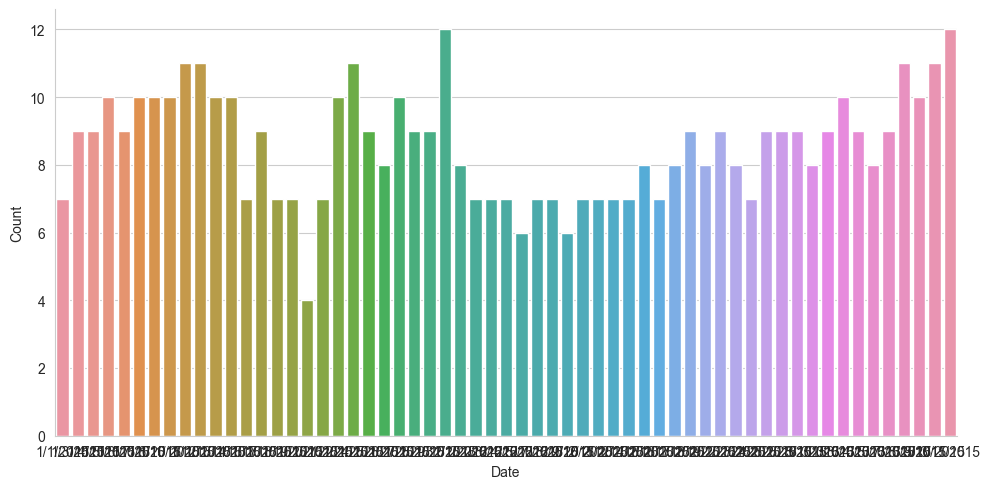

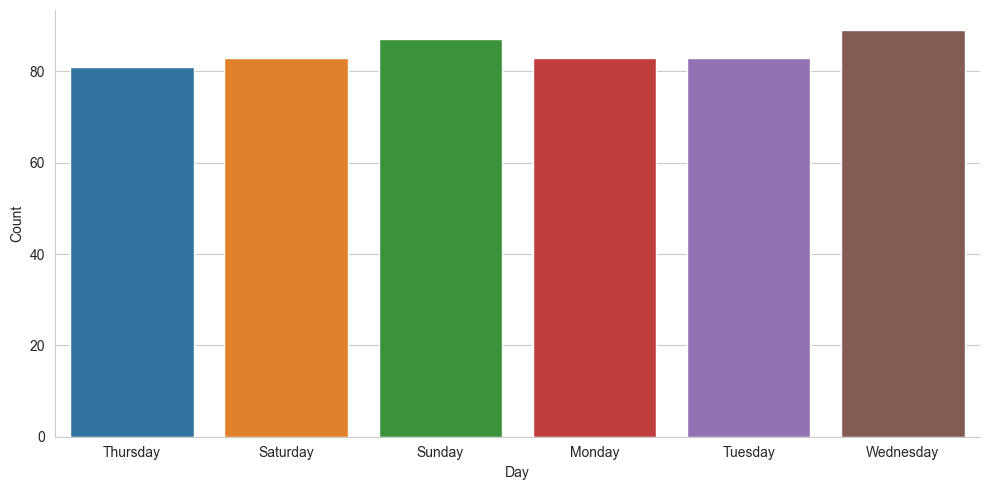

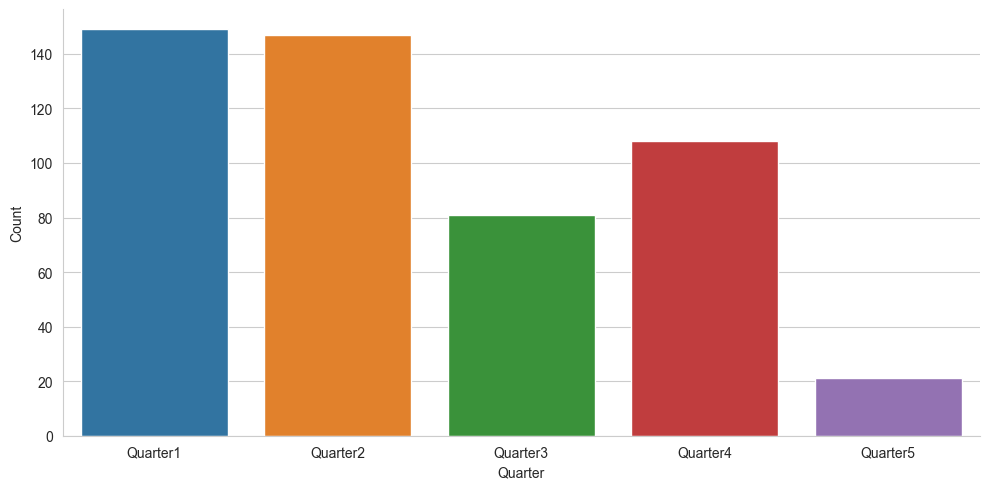

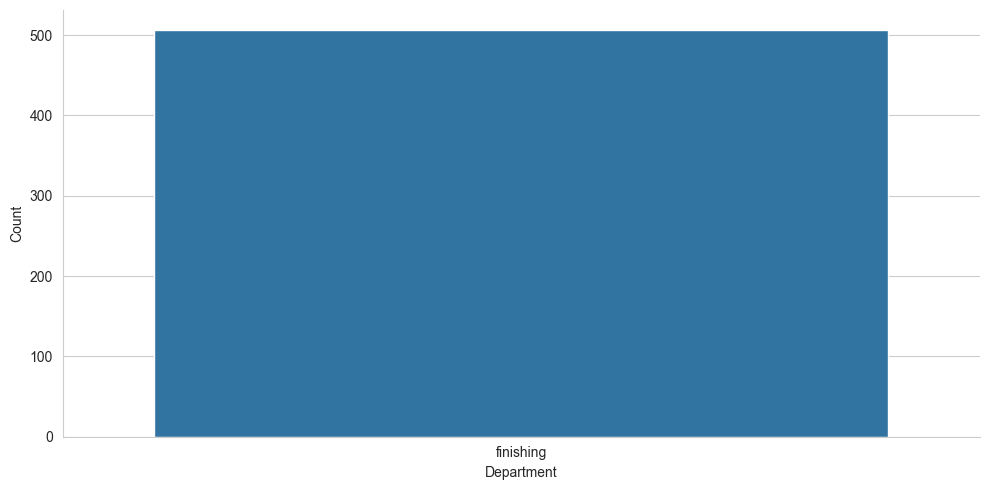

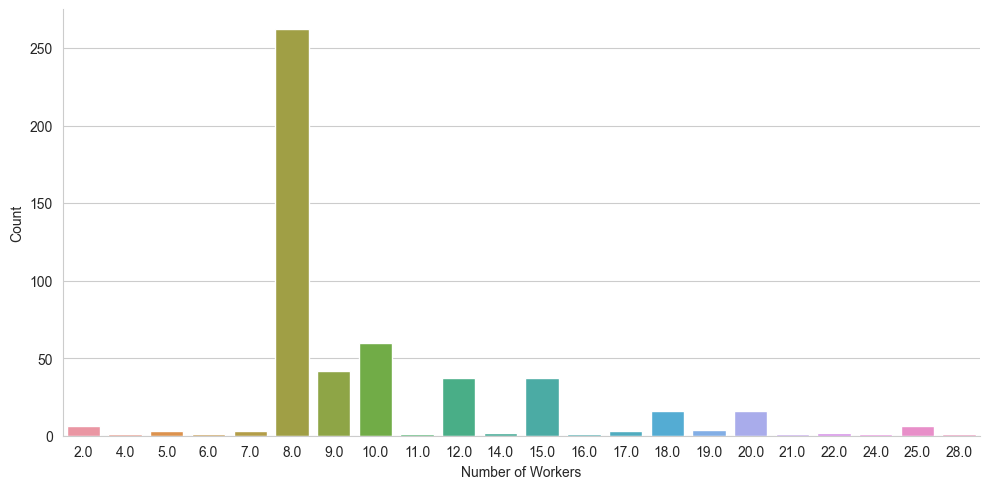

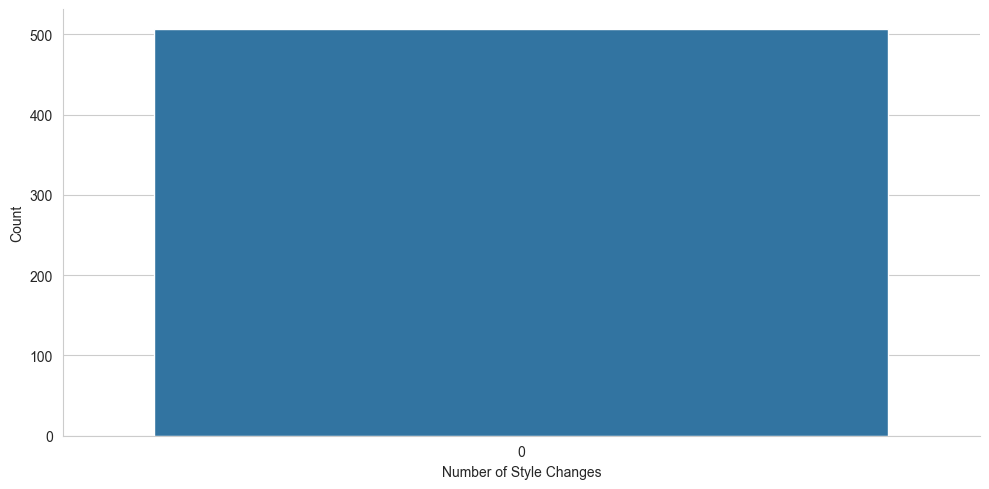

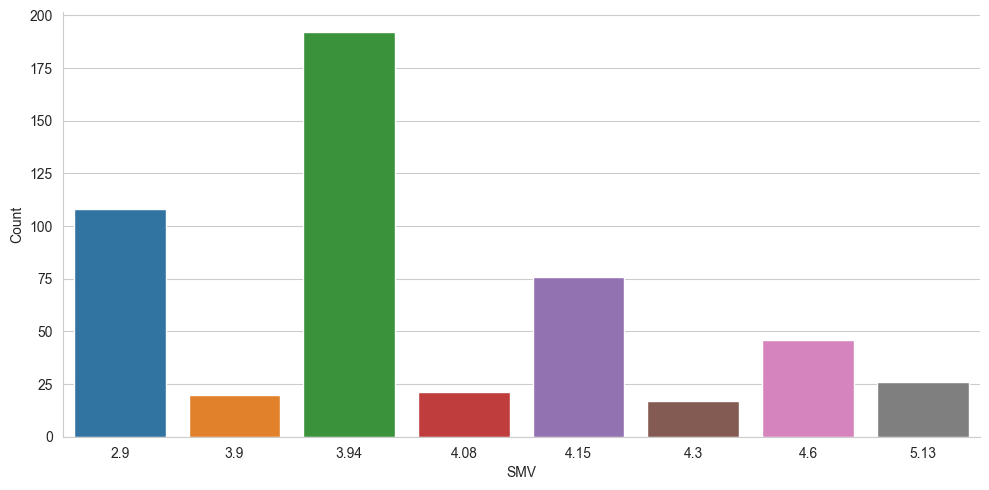

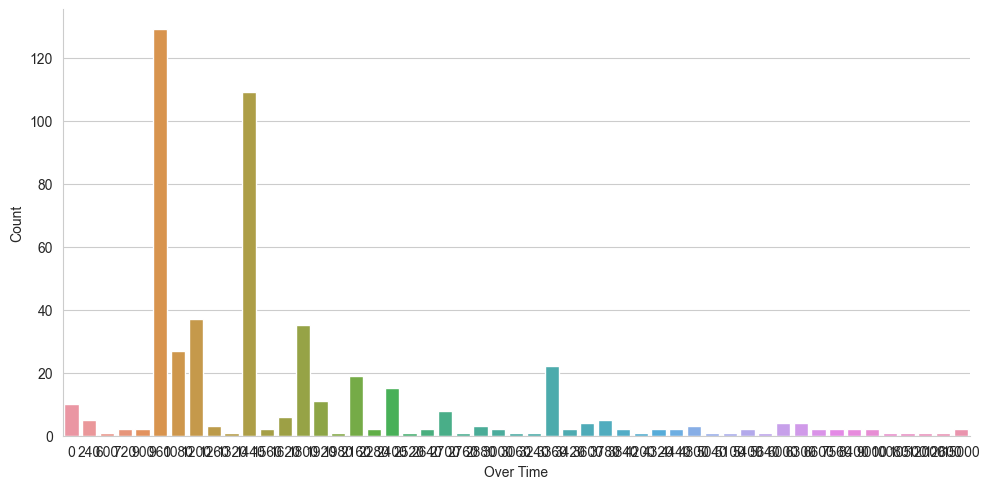

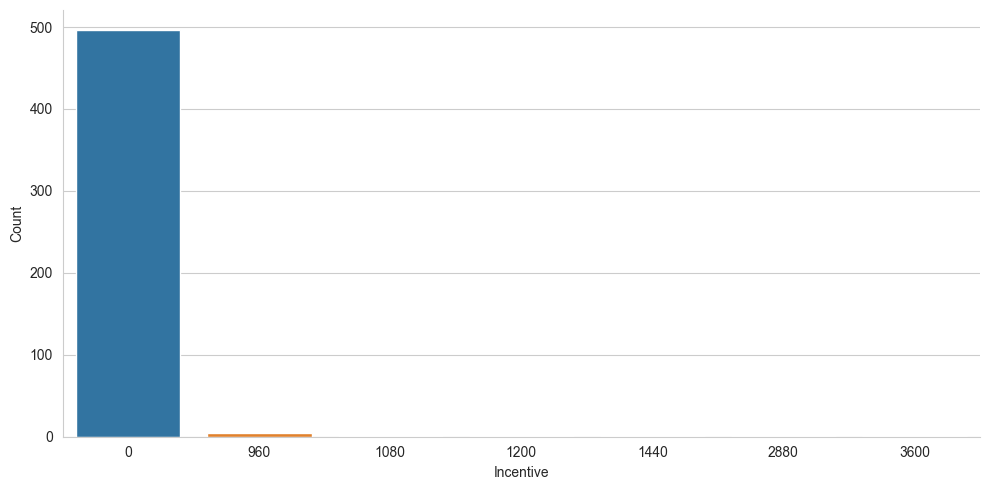

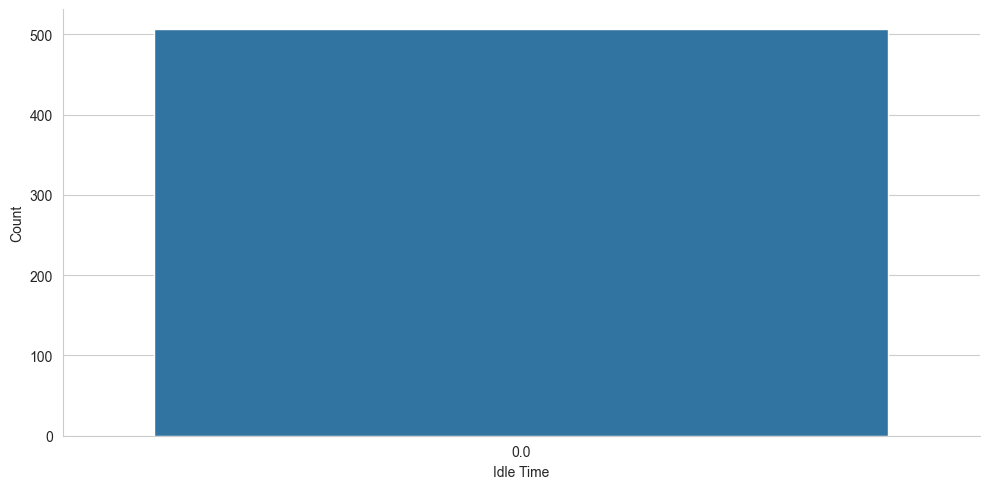

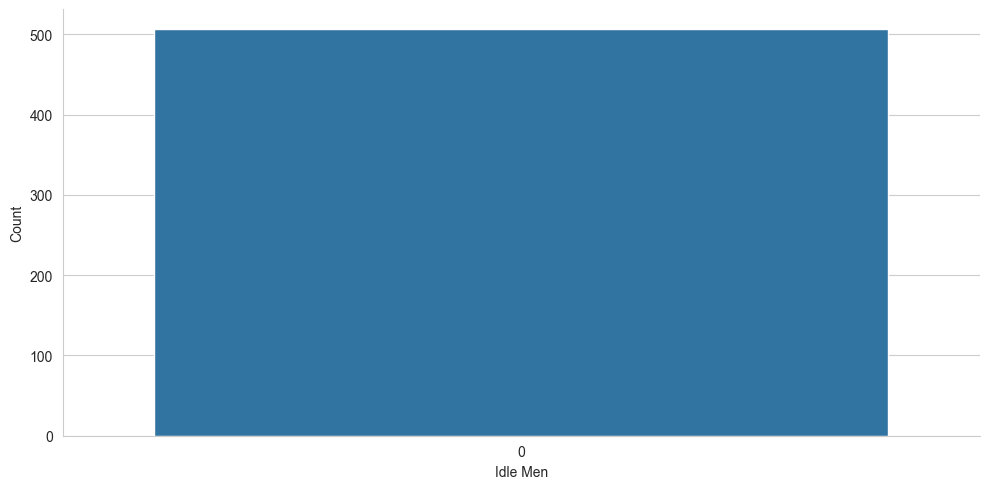

In [58]:


sns.catplot(
    data=datos_finishing,
    x='date',
    kind='count',
    height=5,  # Altura del gráfico
    aspect=2   # Relación de aspecto (ancho / altura)
).set_axis_labels('Date', 'Count')  # Etiqueta los ejes

sns.catplot(
    data=datos_finishing,
    x='day',
    kind='count',
    height=5,
    aspect=2
).set_axis_labels('Day', 'Count')

sns.catplot(
    data=datos_finishing,
    x='quarter',
    kind='count',
    height=5,
    aspect=2
).set_axis_labels('Quarter', 'Count')

sns.catplot(
    data=datos_finishing,
    x='department',
    kind='count',
    height=5,
    aspect=2
).set_axis_labels('Department', 'Count')

sns.catplot(
    data=datos_finishing,
    x='no_of_workers',
    kind='count',
    height=5,
    aspect=2
).set_axis_labels('Number of Workers', 'Count')

sns.catplot(
    data=datos_finishing,
    x='no_of_style_change',
    kind='count',
    height=5,
    aspect=2
).set_axis_labels('Number of Style Changes', 'Count')

sns.catplot(
    data=datos_finishing,
    x='smv',
    kind='count',
    height=5,
    aspect=2
).set_axis_labels('SMV', 'Count')

sns.catplot(
    data=datos_finishing,
    x='over_time',
    kind='count',
    height=5,
    aspect=2
).set_axis_labels('Over Time', 'Count')

sns.catplot(
    data=datos_finishing,
    x='incentive',
    kind='count',
    height=5,
    aspect=2
).set_axis_labels('Incentive', 'Count')

sns.catplot(
    data=datos_finishing,
    x='idle_time',
    kind='count',
    height=5,
    aspect=2
).set_axis_labels('Idle Time', 'Count')

sns.catplot(
    data=datos_finishing,
    x='idle_men',
    kind='count',
    height=5,
    aspect=2
).set_axis_labels('Idle Men', 'Count')


# Muestra los histogramas
plt.show()


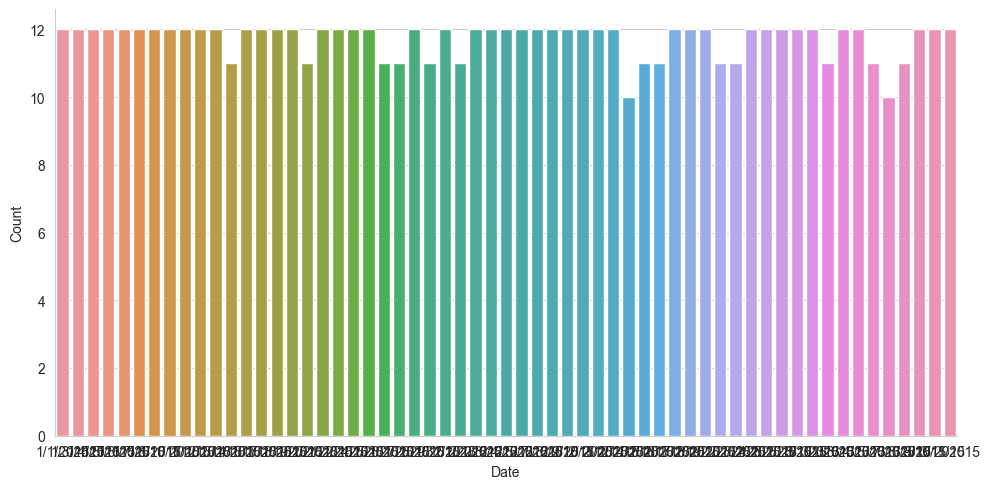

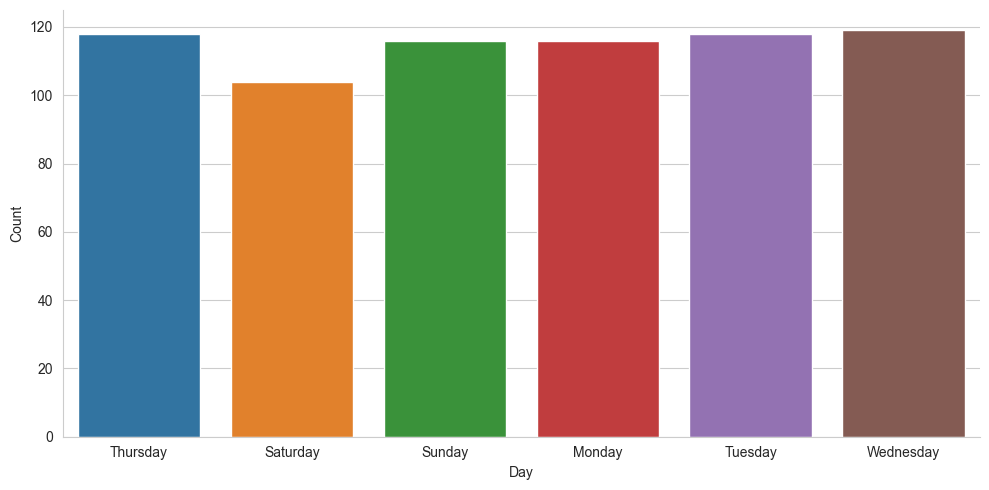

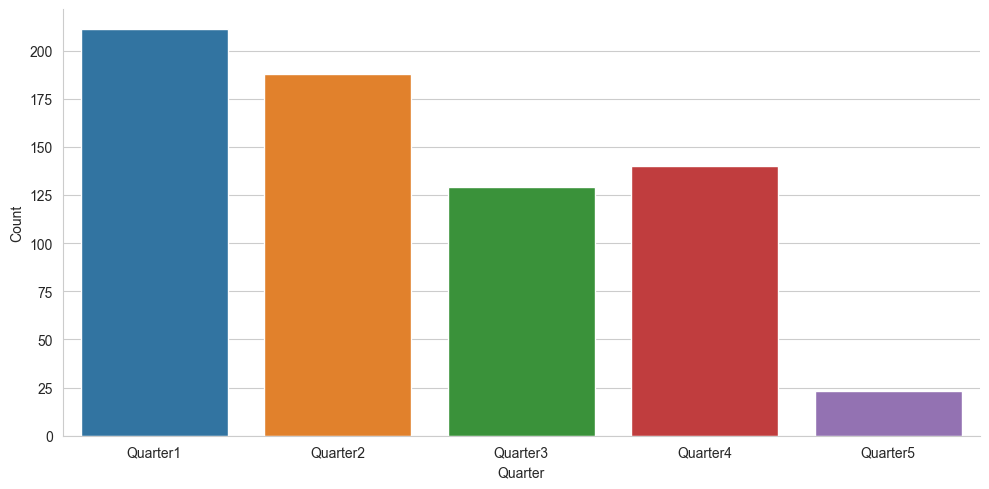

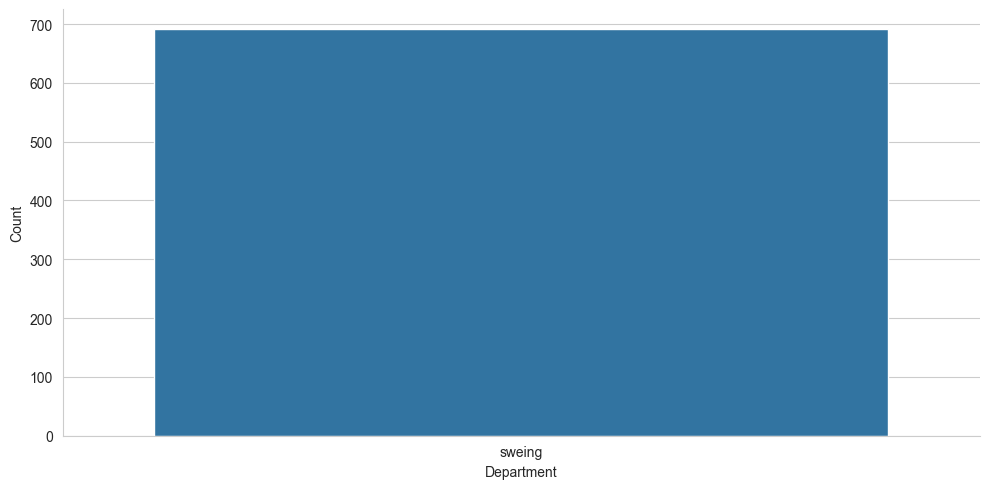

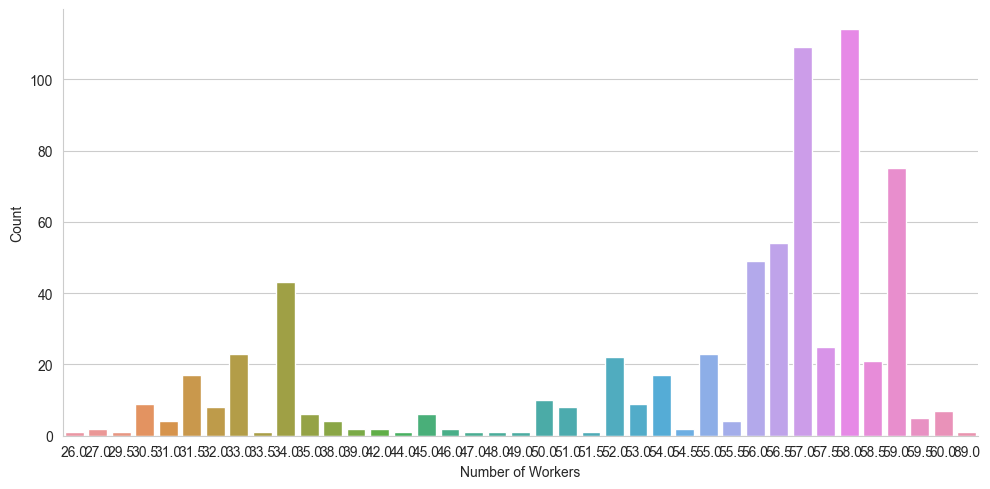

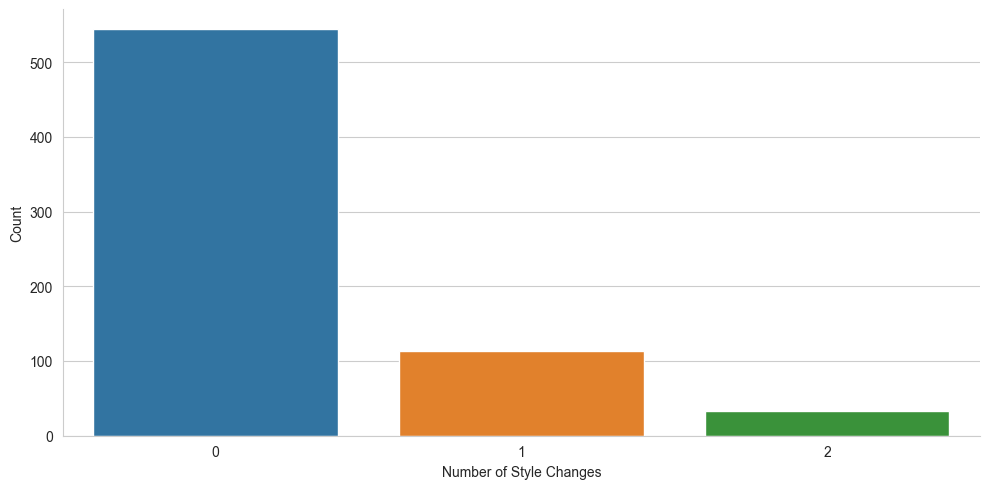

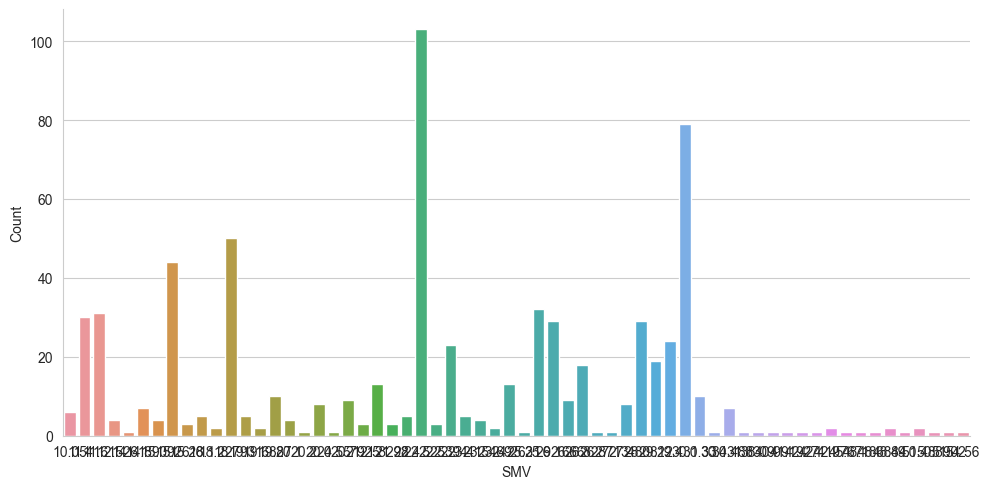

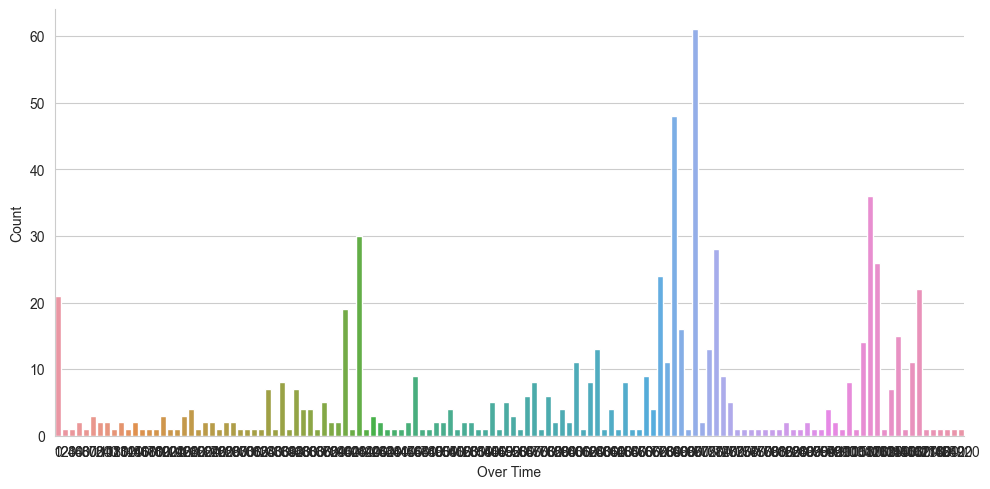

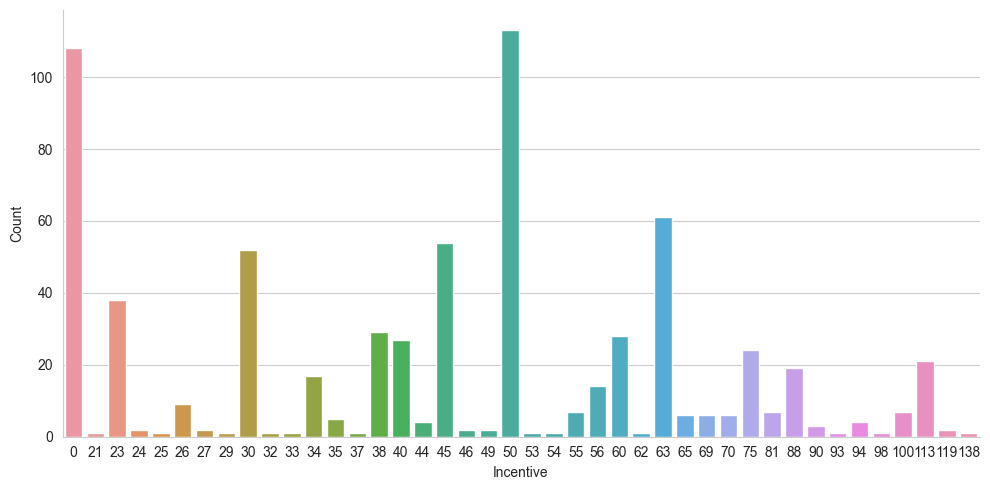

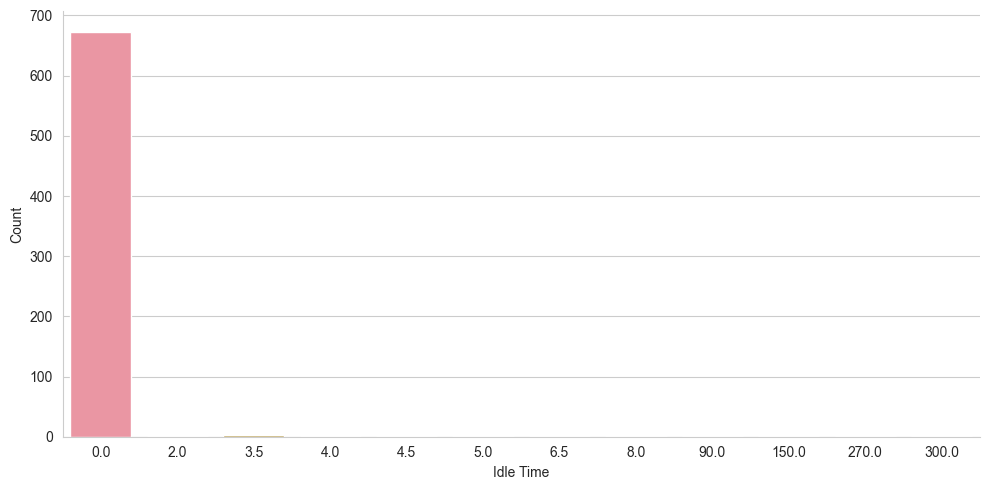

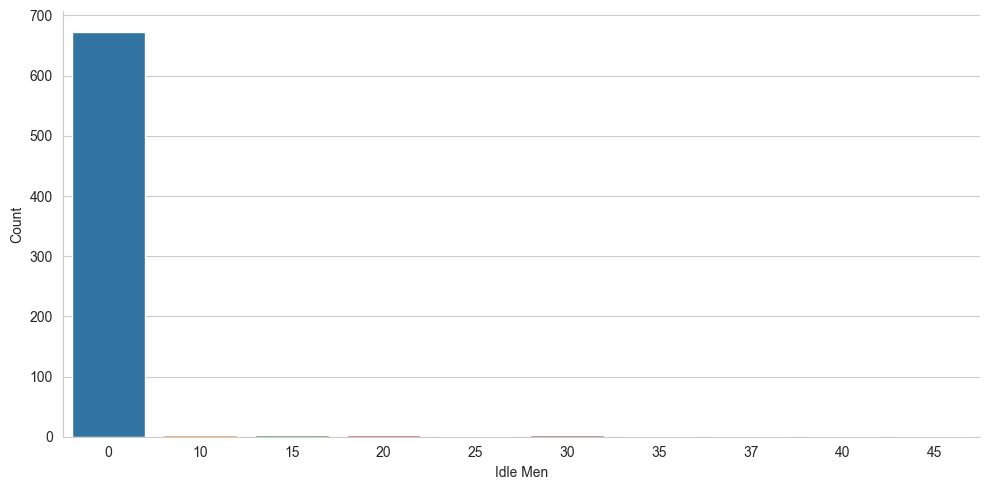

In [59]:


sns.catplot(
    data=datos_sweing,
    x='date',
    kind='count',
    height=5,  # Altura del gráfico
    aspect=2   # Relación de aspecto (ancho / altura)
).set_axis_labels('Date', 'Count')  # Etiqueta los ejes

sns.catplot(
    data=datos_sweing,
    x='day',
    kind='count',
    height=5,
    aspect=2
).set_axis_labels('Day', 'Count')

sns.catplot(
    data=datos_sweing,
    x='quarter',
    kind='count',
    height=5,
    aspect=2
).set_axis_labels('Quarter', 'Count')

sns.catplot(
    data=datos_sweing,
    x='department',
    kind='count',
    height=5,
    aspect=2
).set_axis_labels('Department', 'Count')

sns.catplot(
    data=datos_sweing,
    x='no_of_workers',
    kind='count',
    height=5,
    aspect=2
).set_axis_labels('Number of Workers', 'Count')

sns.catplot(
    data=datos_sweing,
    x='no_of_style_change',
    kind='count',
    height=5,
    aspect=2
).set_axis_labels('Number of Style Changes', 'Count')

sns.catplot(
    data=datos_sweing,
    x='smv',
    kind='count',
    height=5,
    aspect=2
).set_axis_labels('SMV', 'Count')

sns.catplot(
    data=datos_sweing,
    x='over_time',
    kind='count',
    height=5,
    aspect=2
).set_axis_labels('Over Time', 'Count')

sns.catplot(
    data=datos_sweing,
    x='incentive',
    kind='count',
    height=5,
    aspect=2
).set_axis_labels('Incentive', 'Count')

sns.catplot(
    data=datos_sweing,
    x='idle_time',
    kind='count',
    height=5,
    aspect=2
).set_axis_labels('Idle Time', 'Count')

sns.catplot(
    data=datos_sweing,
    x='idle_men',
    kind='count',
    height=5,
    aspect=2
).set_axis_labels('Idle Men', 'Count')


# Muestra los histogramas
plt.show()
